In [1]:
!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
import warnings
warnings.filterwarnings('ignore')


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [9]:

# 使用例
table_name = 'StatisticsVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2025)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for y in years:
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  columns_to_drop = [ 'sv_program_id','sv_horse_id', 'upd']
  df = df_summary.drop(columns=columns_to_drop)
  dict_statistics[y] = df

25


In [10]:
print(len(dict_statistics[2000].columns))

31


In [11]:
dict_statistics[2000]

,sv_feet_pb1,sv_feet_pb2,sv_feet_pb3,sv_feet_pb4,sv_burdern,sv_odds,sv_weight,sv_timediff,sv_deviation,sv_deviation3f,sv_win_ratio,sv_mul_ratio,sv_avg_distance,sv_distance_diff,sv_arg_dev,sv_arg_3fd,sv_straight_dev,sv_l_corner_dev,sv_r_corner_dev,sv_turf_dev,sv_dirt_dev,sv_sire_win_score,sv_sire_mul_score,sv_tr_score,sv_jk_score,sv_speed_exp,sv_speed_3f_exp,sv_speed_exp_l4,sv_vote,sv_win_score_wa,sv_mul_score_wa
0,0.00,0.00,0.00,0.00,0.21,0.00,0.41,0.92,0.26,0.50,0.00,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.59,0,0.00,0.88,0.00,0.00
1,0.00,0.00,0.00,0.00,0.21,0.00,0.36,1.00,0.11,0.50,0.00,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.49,0,0.00,0.59,0.00,0.00
2,0.00,0.00,0.00,0.00,0.21,0.00,0.41,0.86,0.42,0.50,0.00,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65,0,0.00,0.94,0.00,0.00
3,0.00,0.00,0.00,0.00,0.21,0.00,0.27,0.97,0.17,0.50,0.00,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.54,0,0.00,0.65,0.00,0.00
4,0.17,0.17,0.17,0.48,0.24,0.00,0.41,0.99,0.15,0.50,0.00,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.54,0,0.00,0.82,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71826,0.00,0.00,0.00,0.00,0.21,0.00,0.60,0.93,0.11,0.50,0.00,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.51,0,0.00,0.76,0.00,0.00
71827,0.00,0.00,0.00,0.00,0.18,0.00,0.52,0.93,0.08,0.50,0.00,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0,0.00,0.71,0.00,0.00
71828,0.00,0.00,0.00,0.00,0.21,0.00,0.48,0.96,0.06,0.50,0.00,0.00,0,0,0.04,0.50,0,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.43,0,0.45,0.24,0.00,0.00
71829,0.00,0.00,0.00,0.00,0.21,0.00,0.44,0.97,0.25,0.50,0.00,0.00,0,0,0.06,0.50,0,0.00,0.06,0.00,0.06,0.00,0.00,0.00,0.00,0.47,0,0.22,0.82,0.00,0.00


sv_feet_pb1


<Figure size 640x480 with 0 Axes>

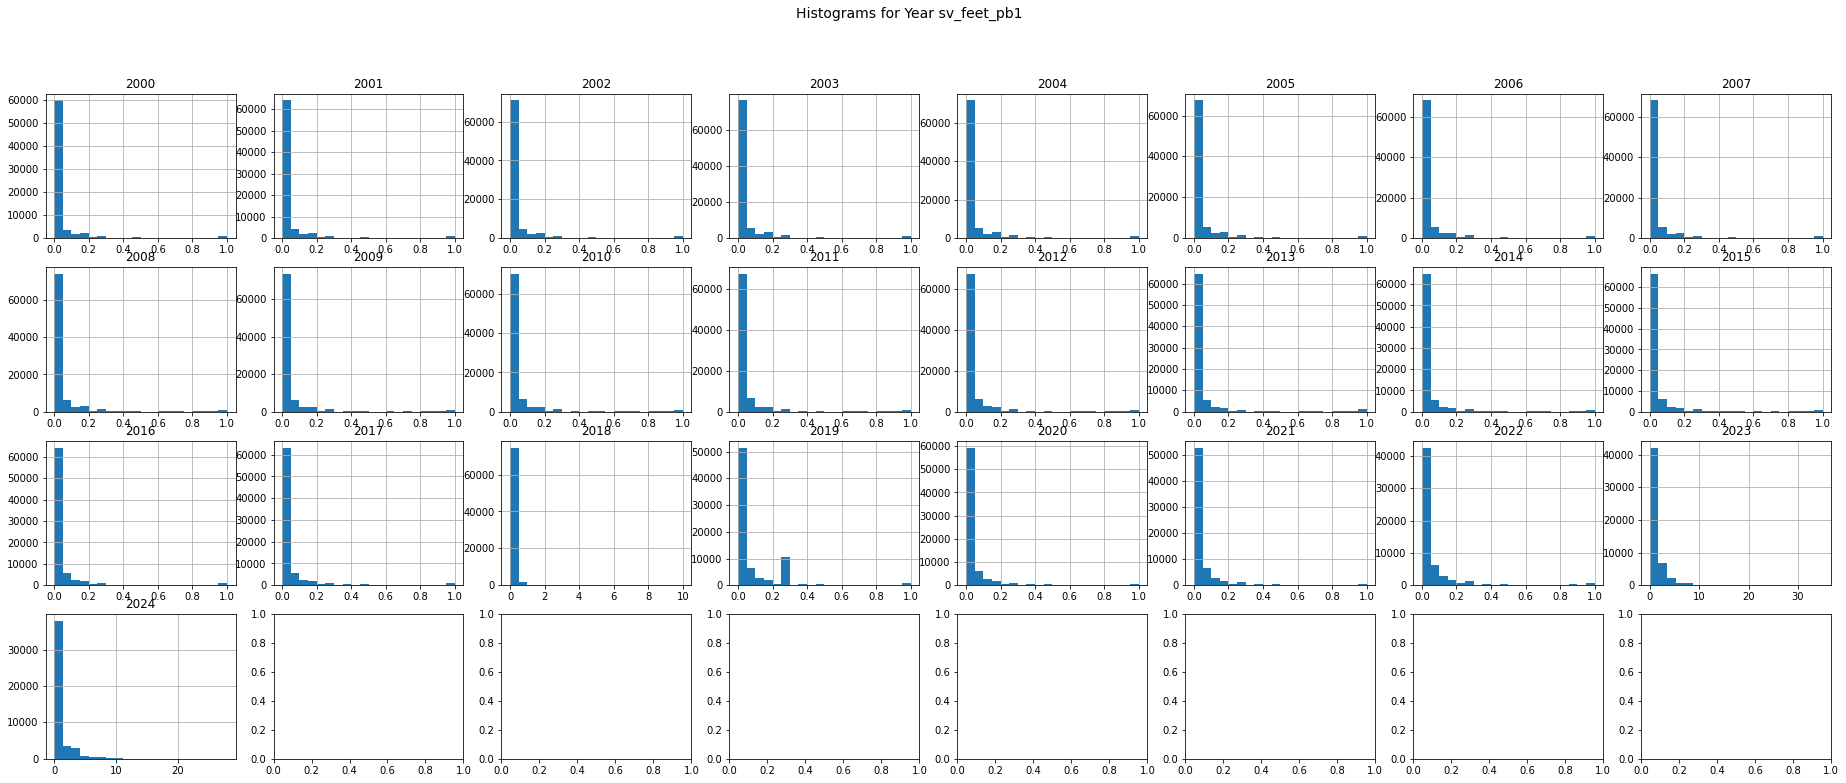

sv_feet_pb2


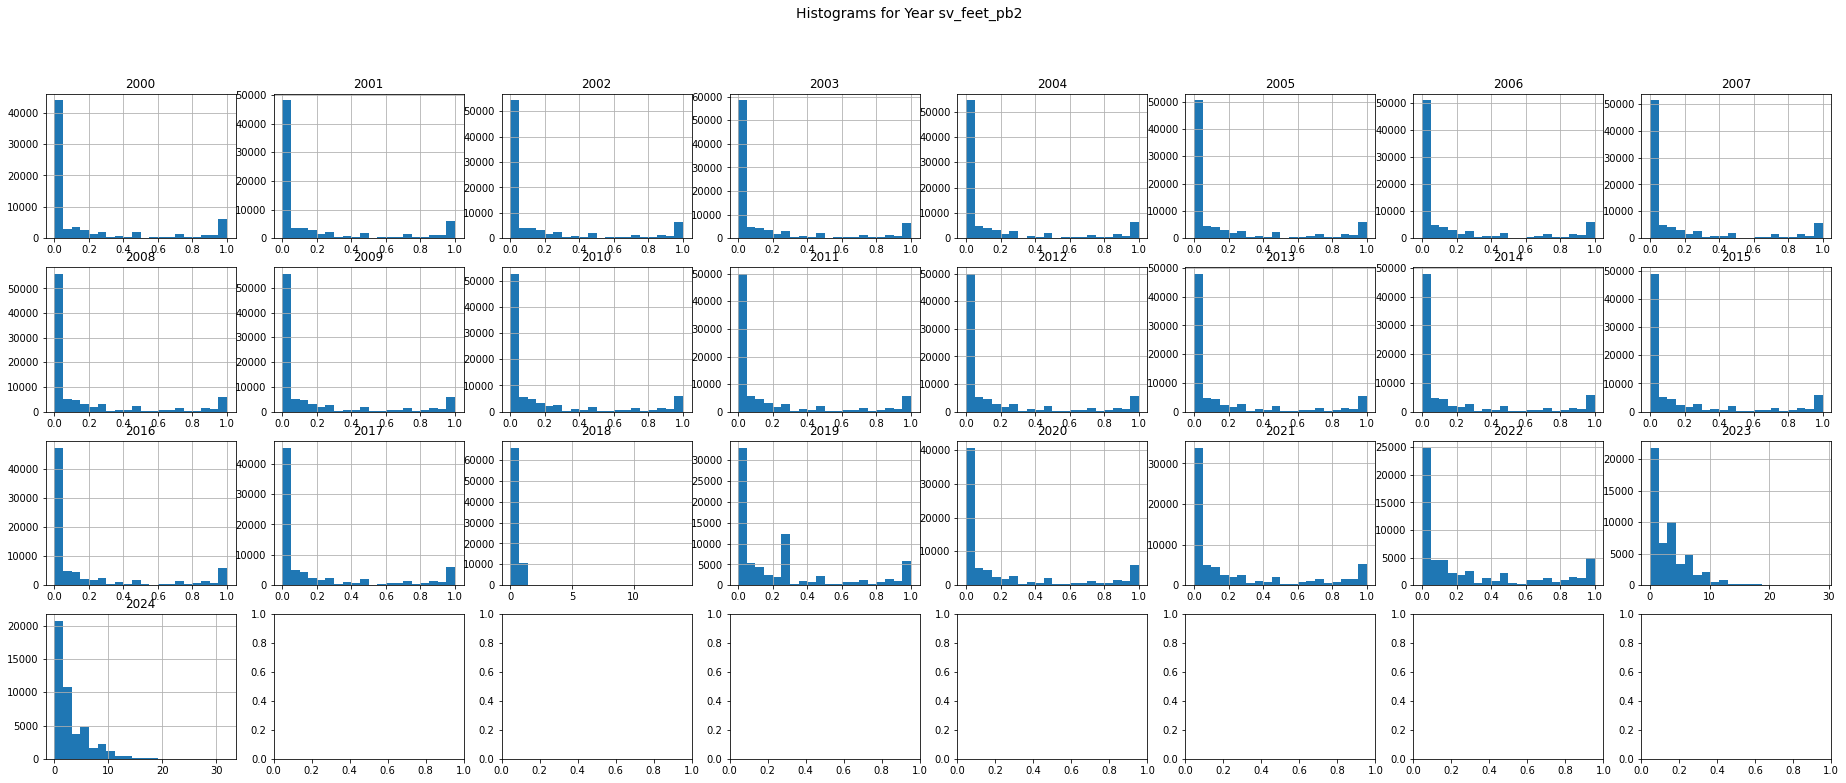

sv_feet_pb3


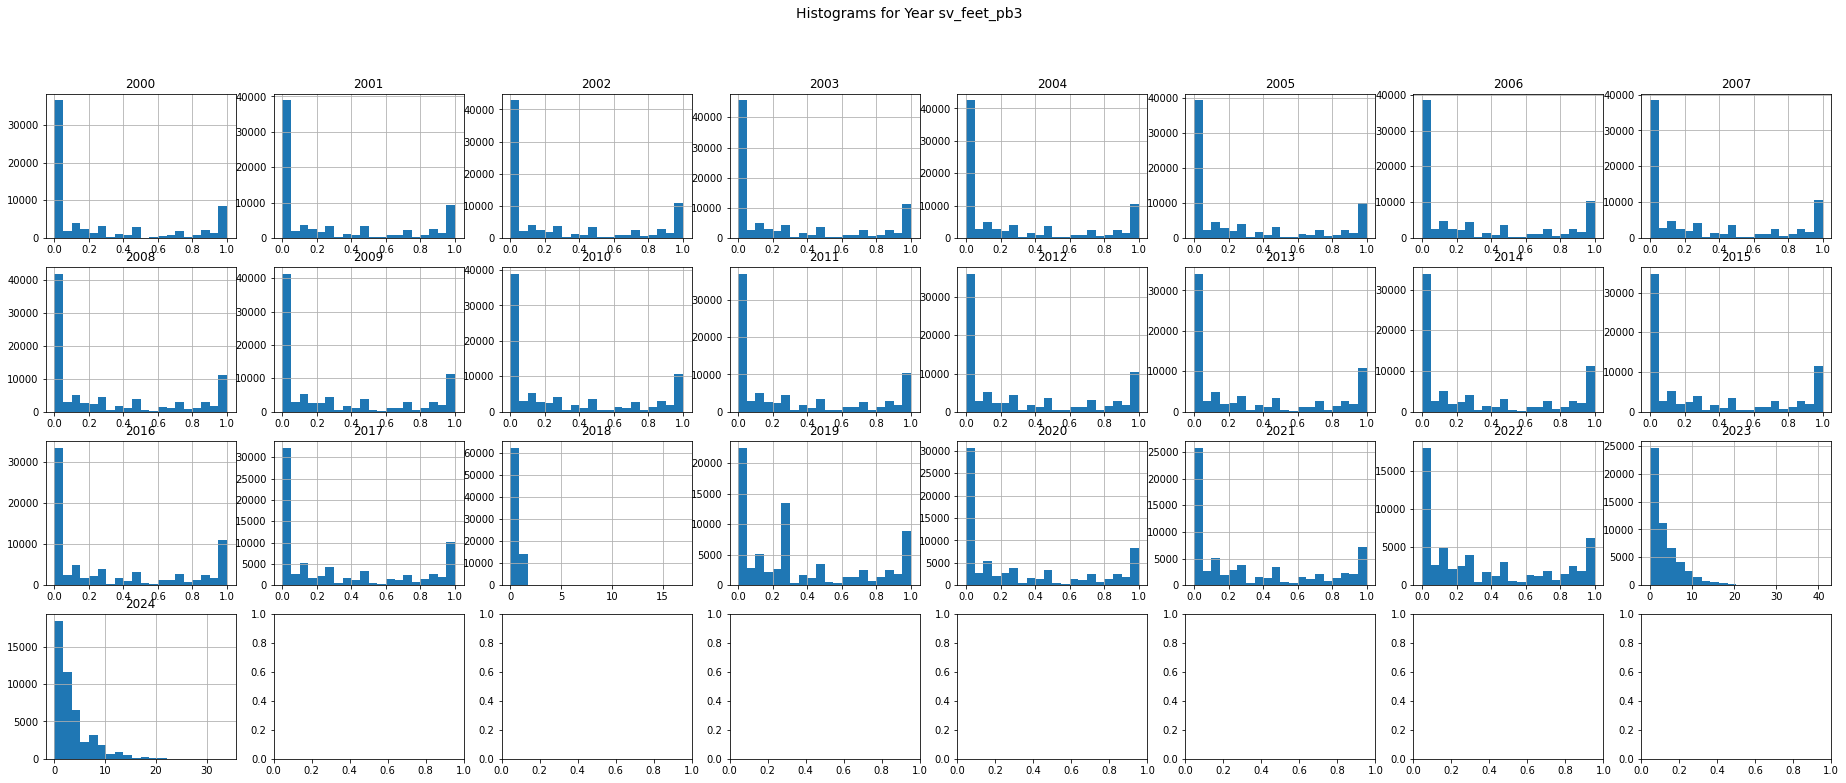

sv_feet_pb4


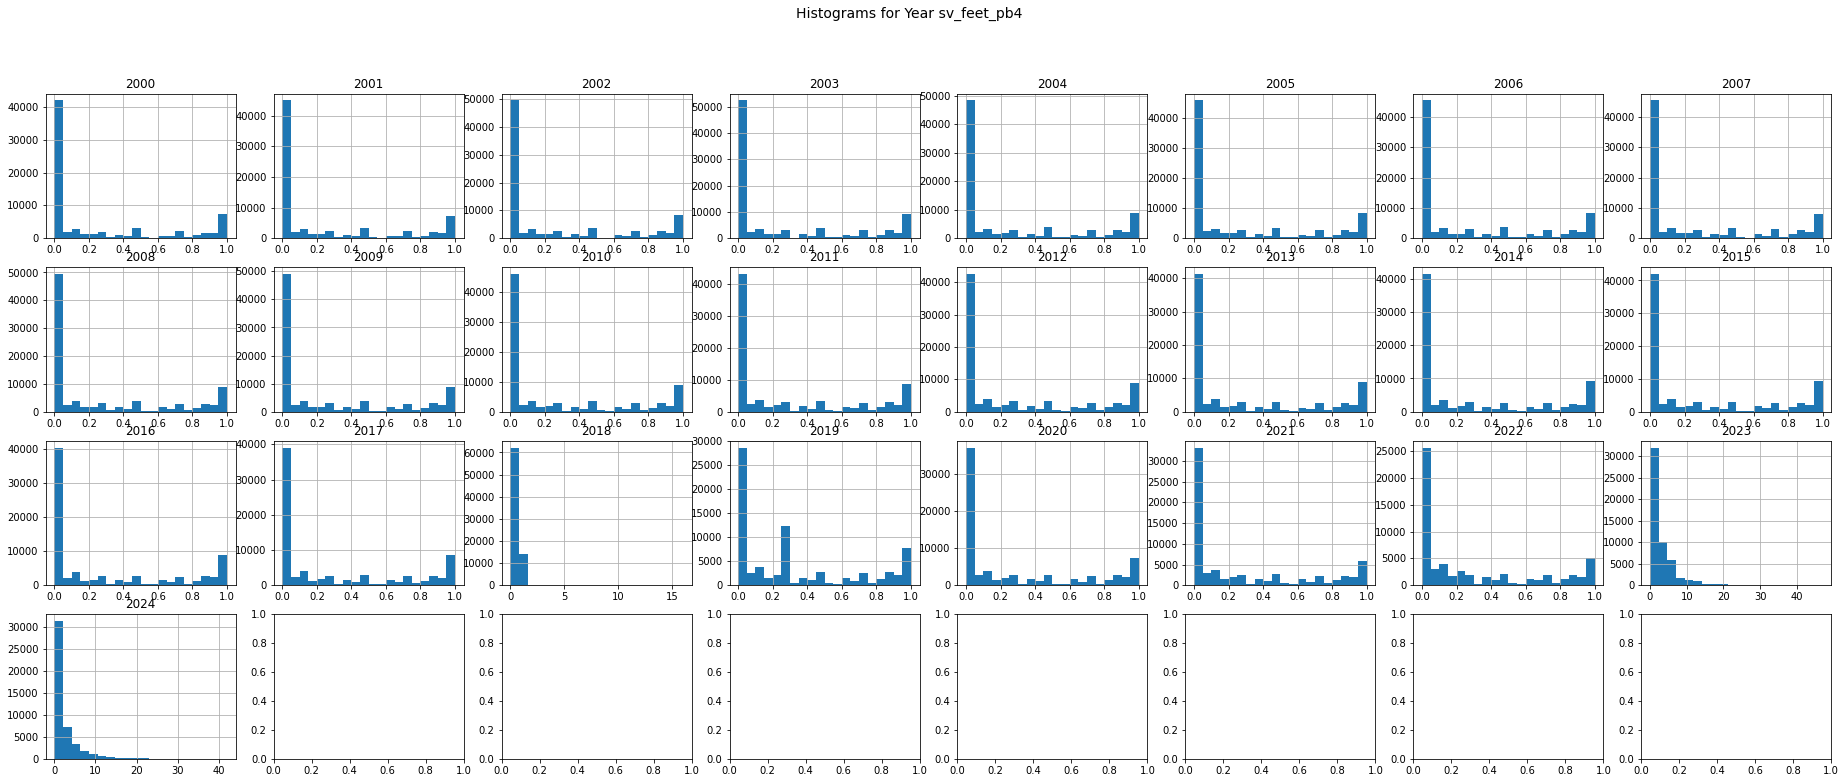

sv_burdern


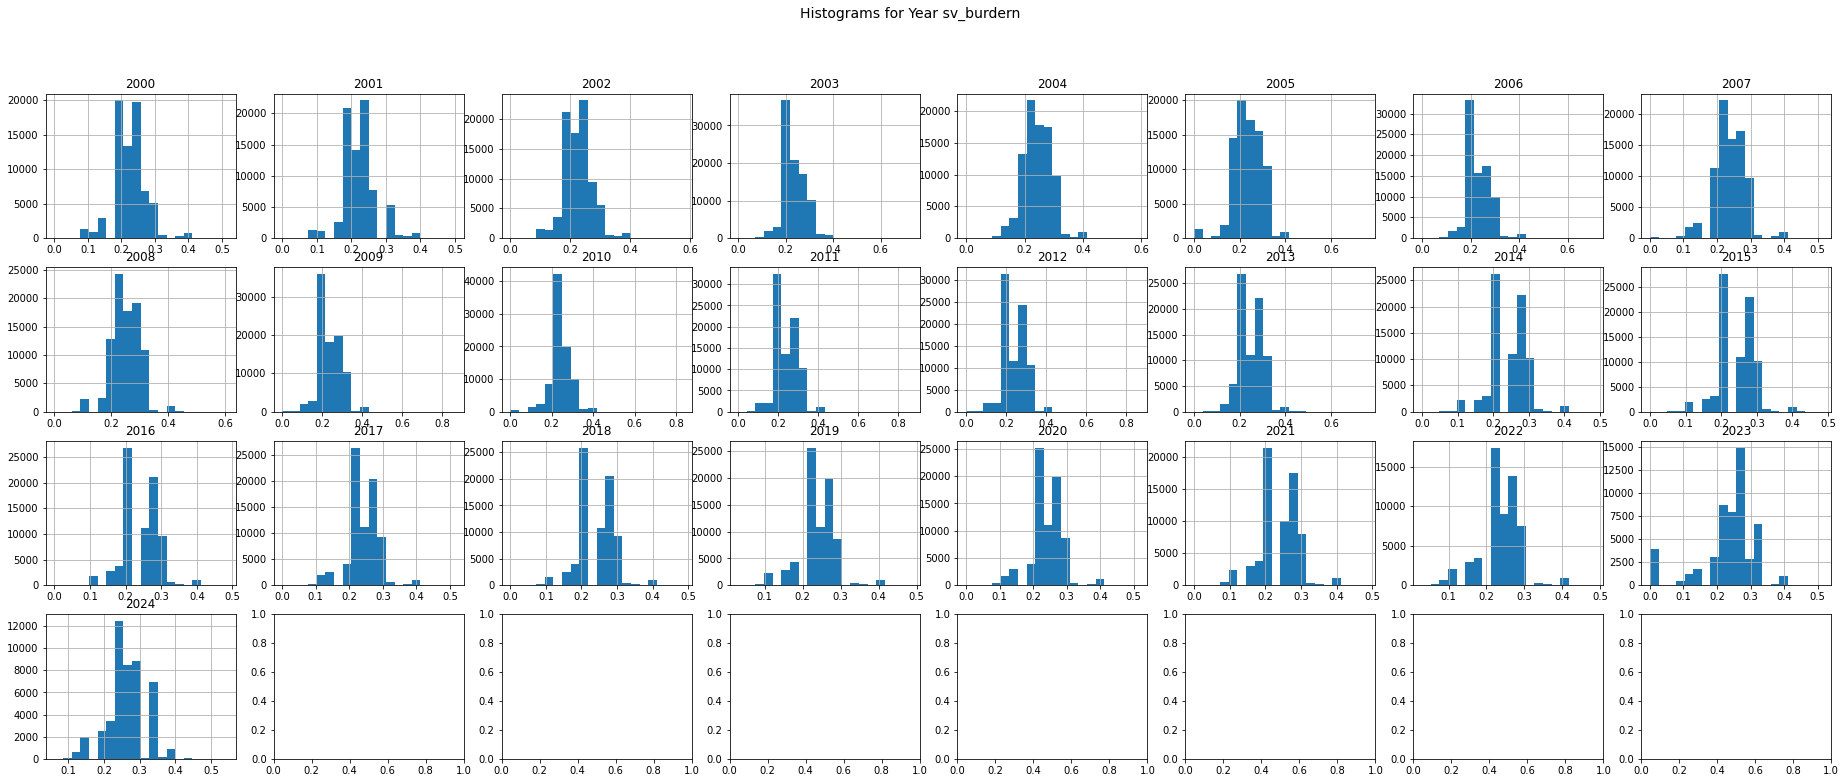

sv_odds


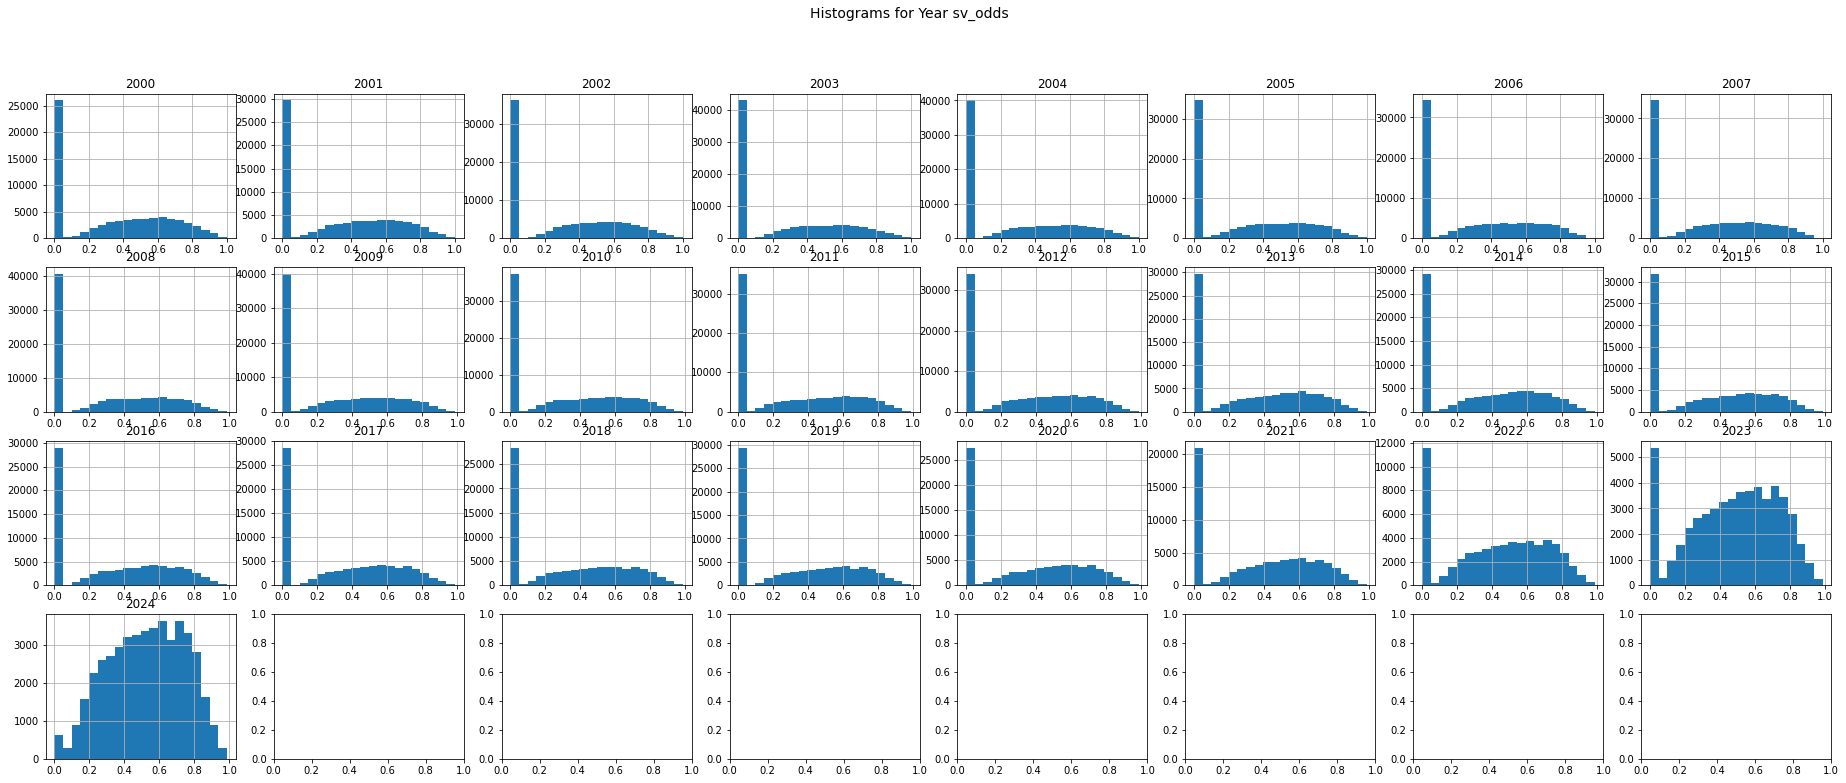

sv_weight


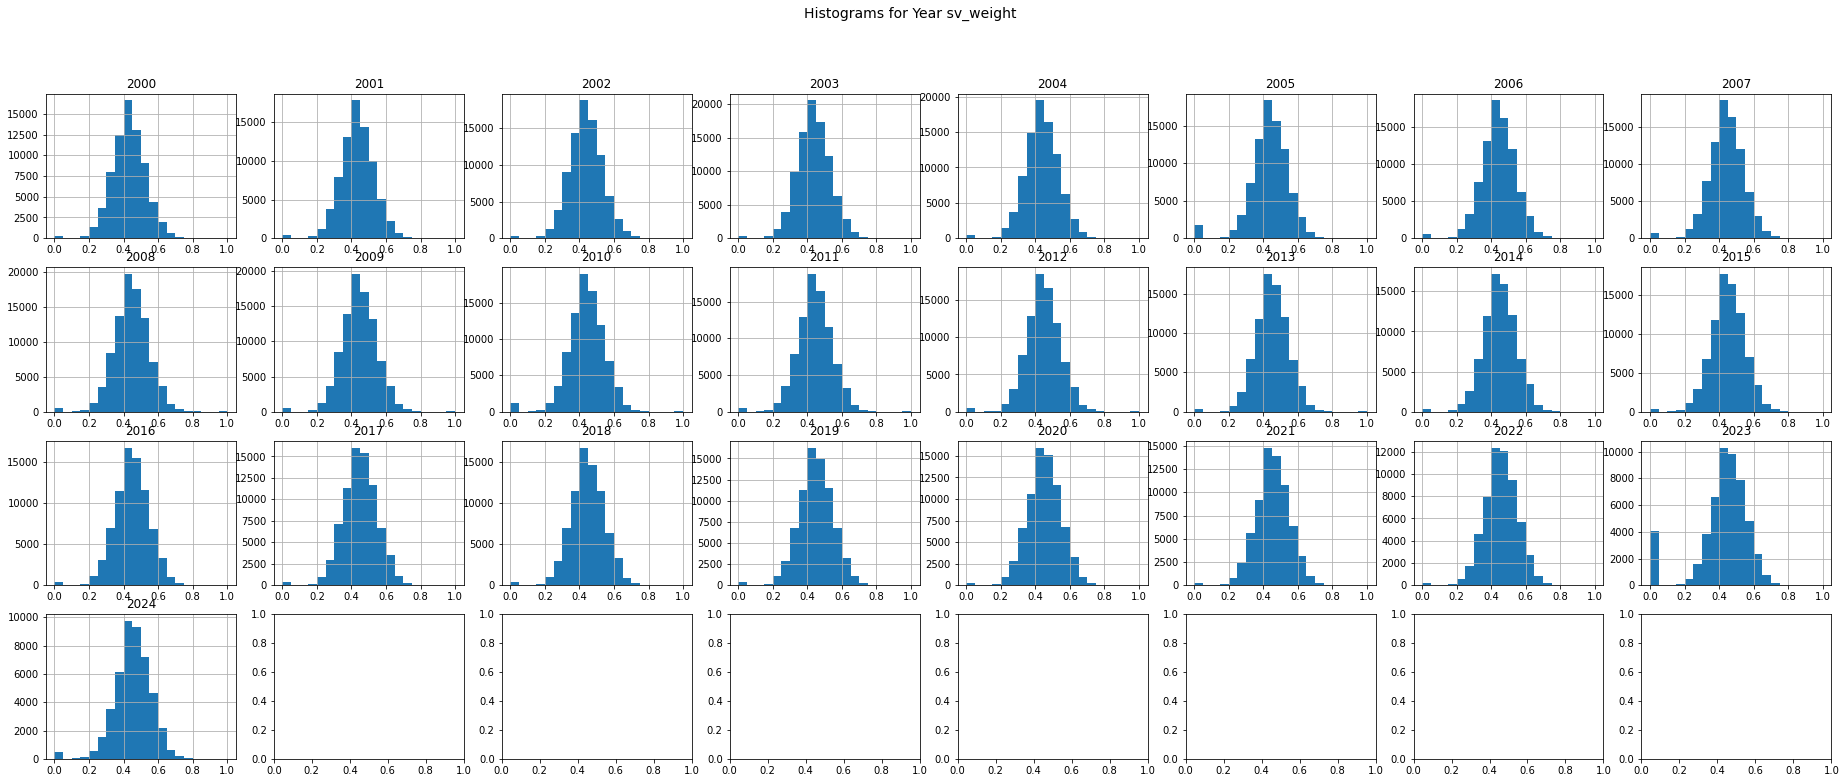

sv_timediff


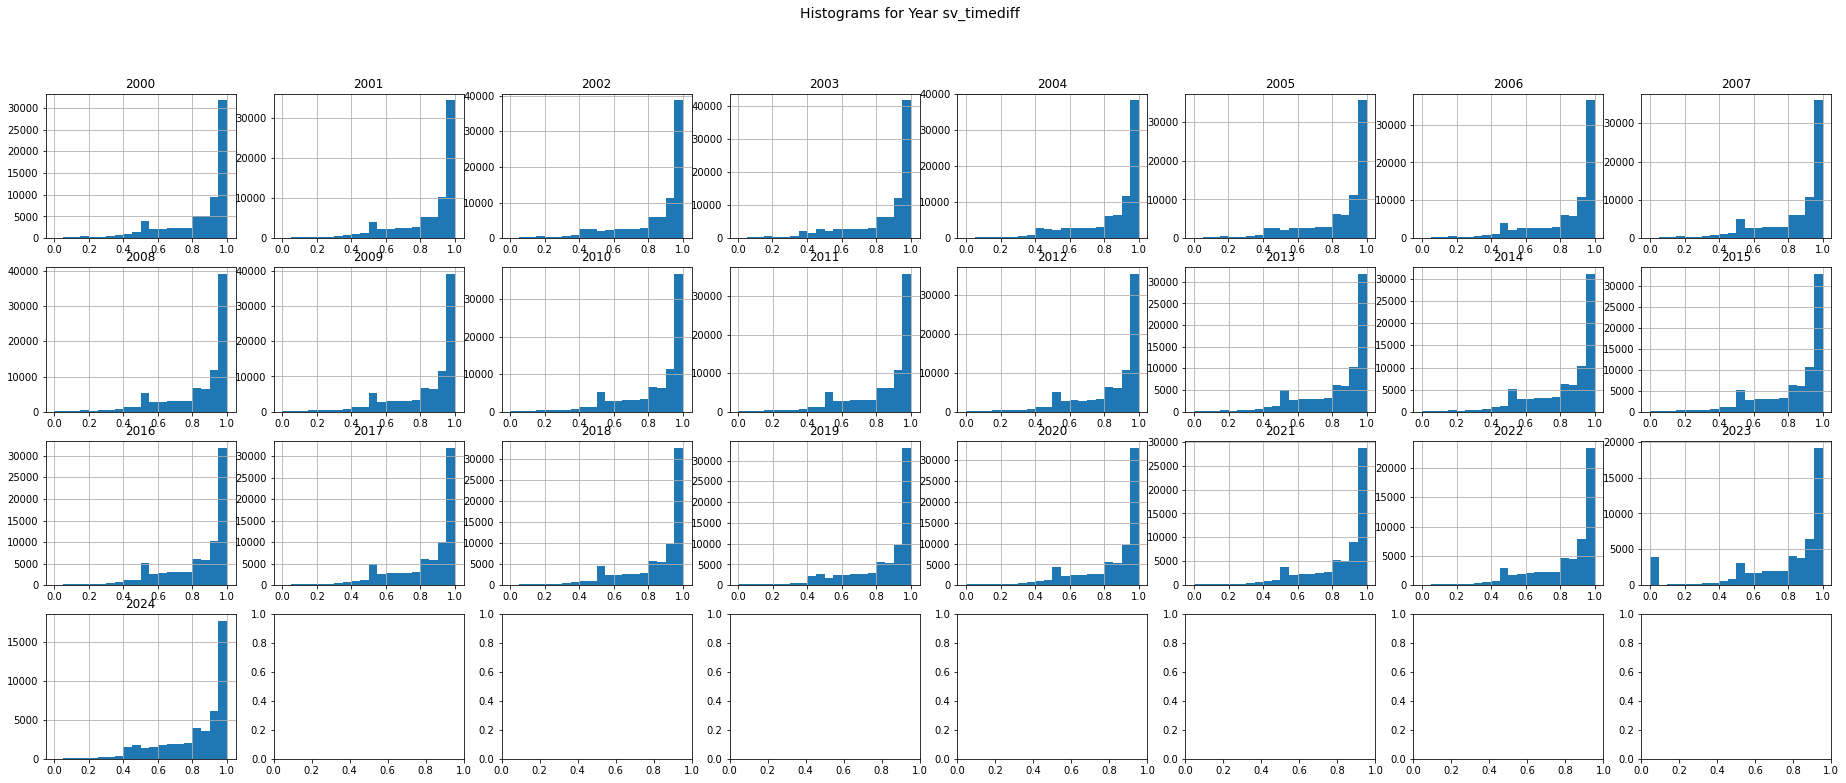

sv_deviation


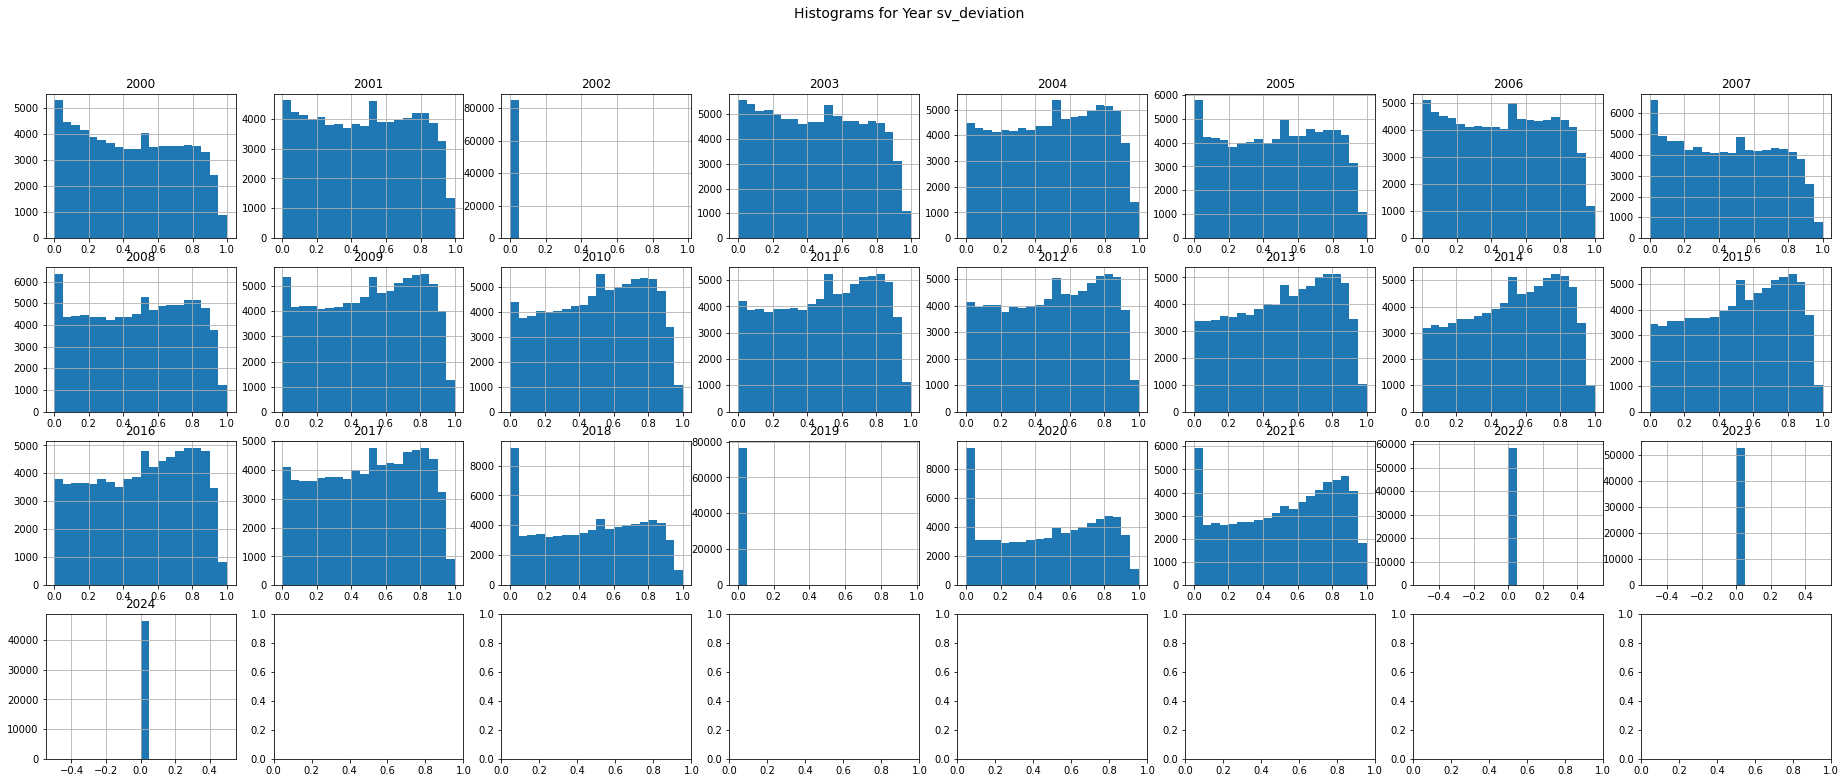

sv_deviation3f


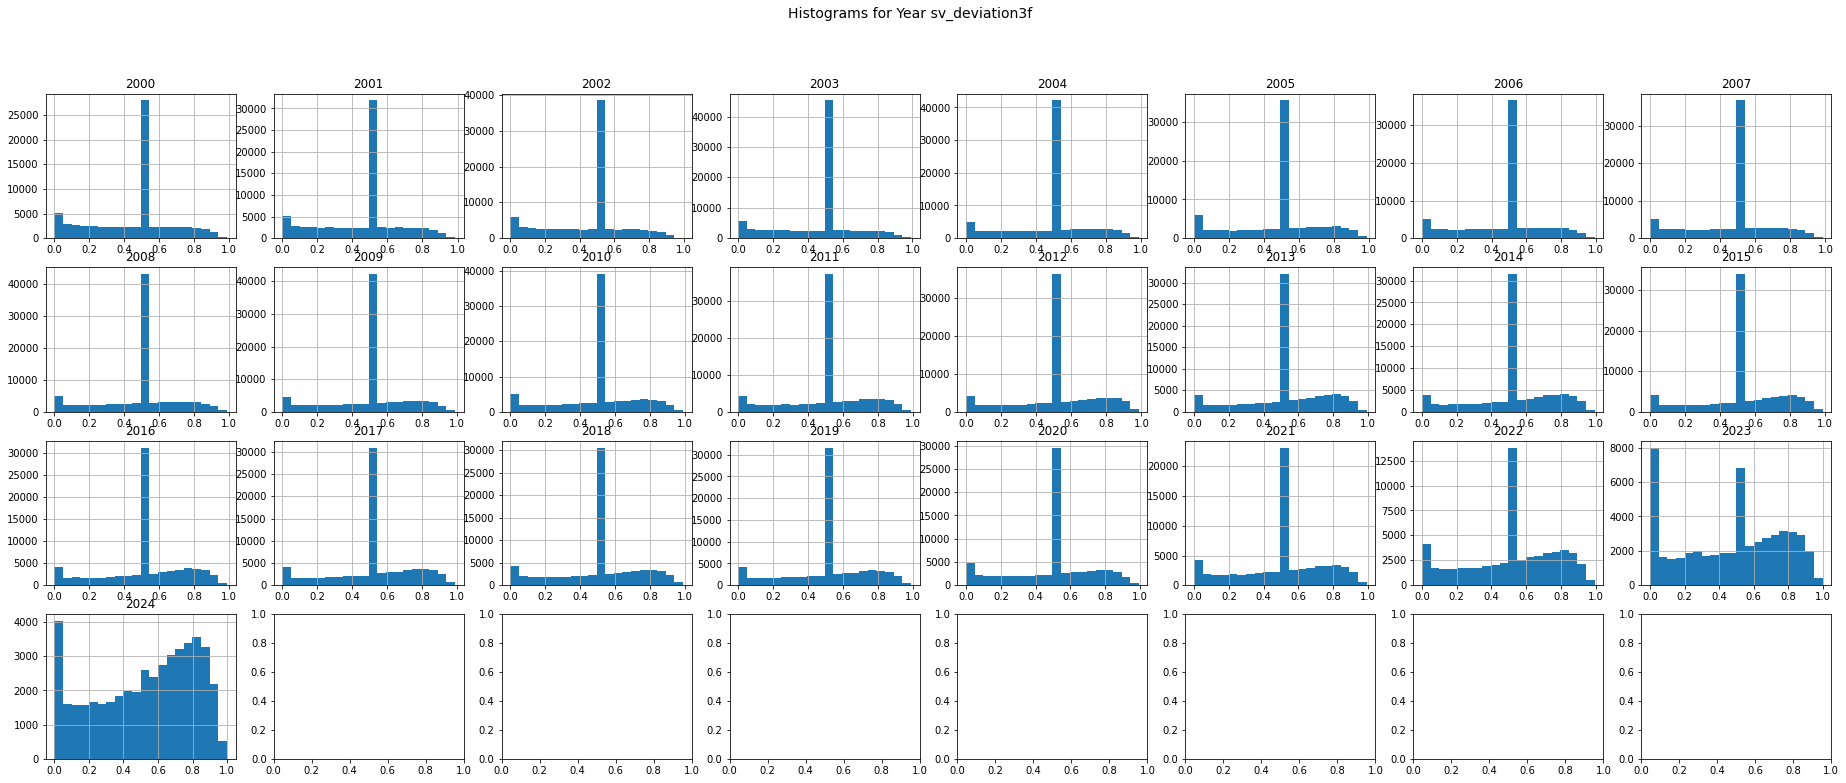

sv_win_ratio


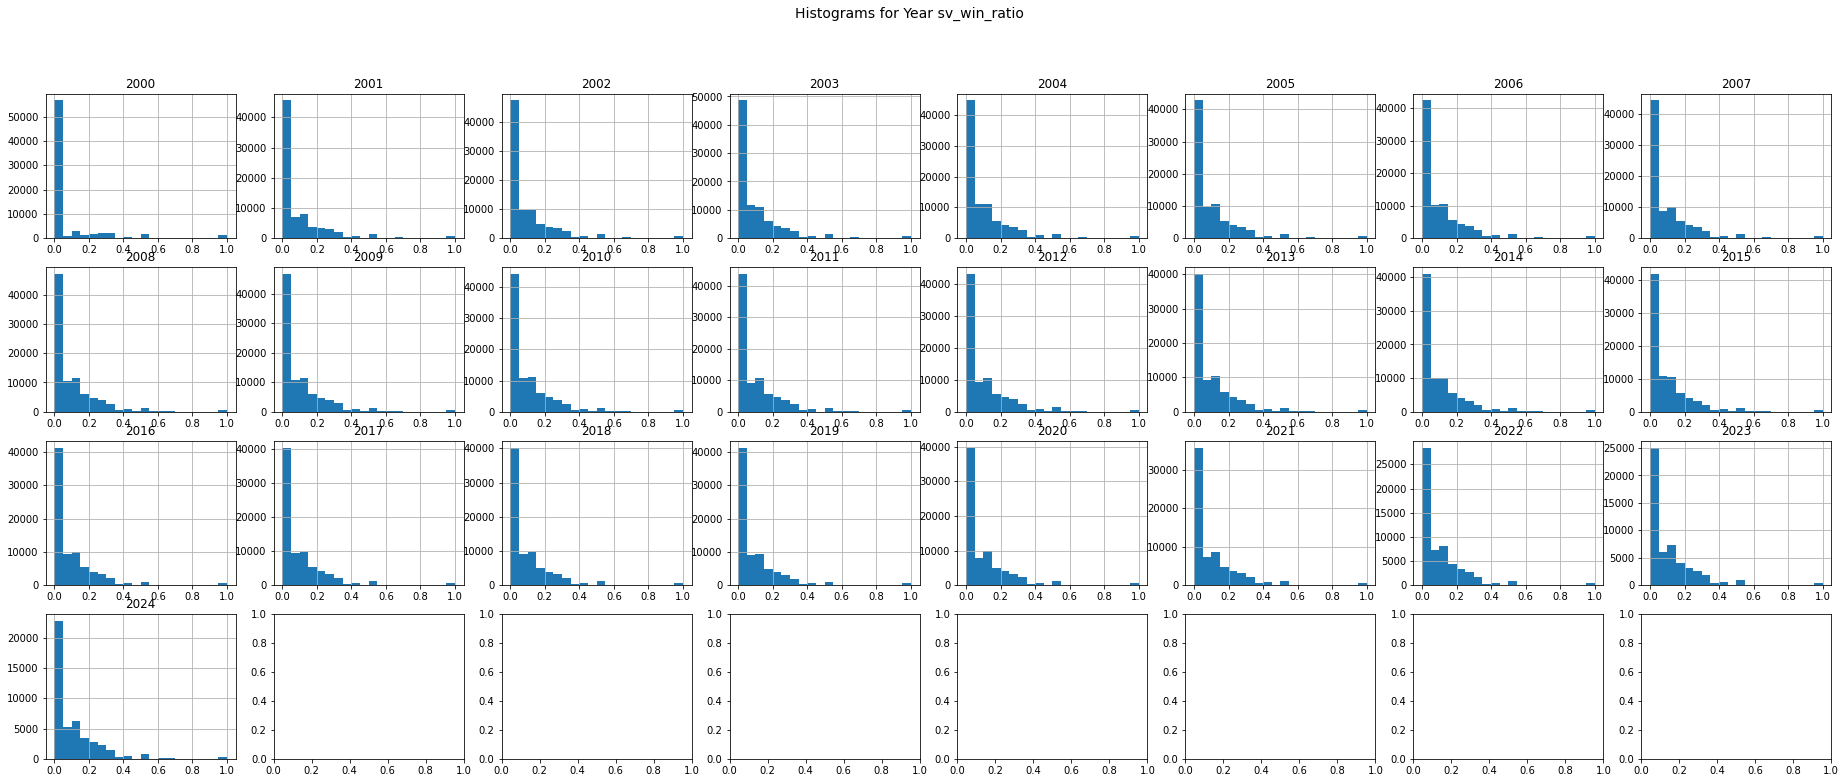

sv_mul_ratio


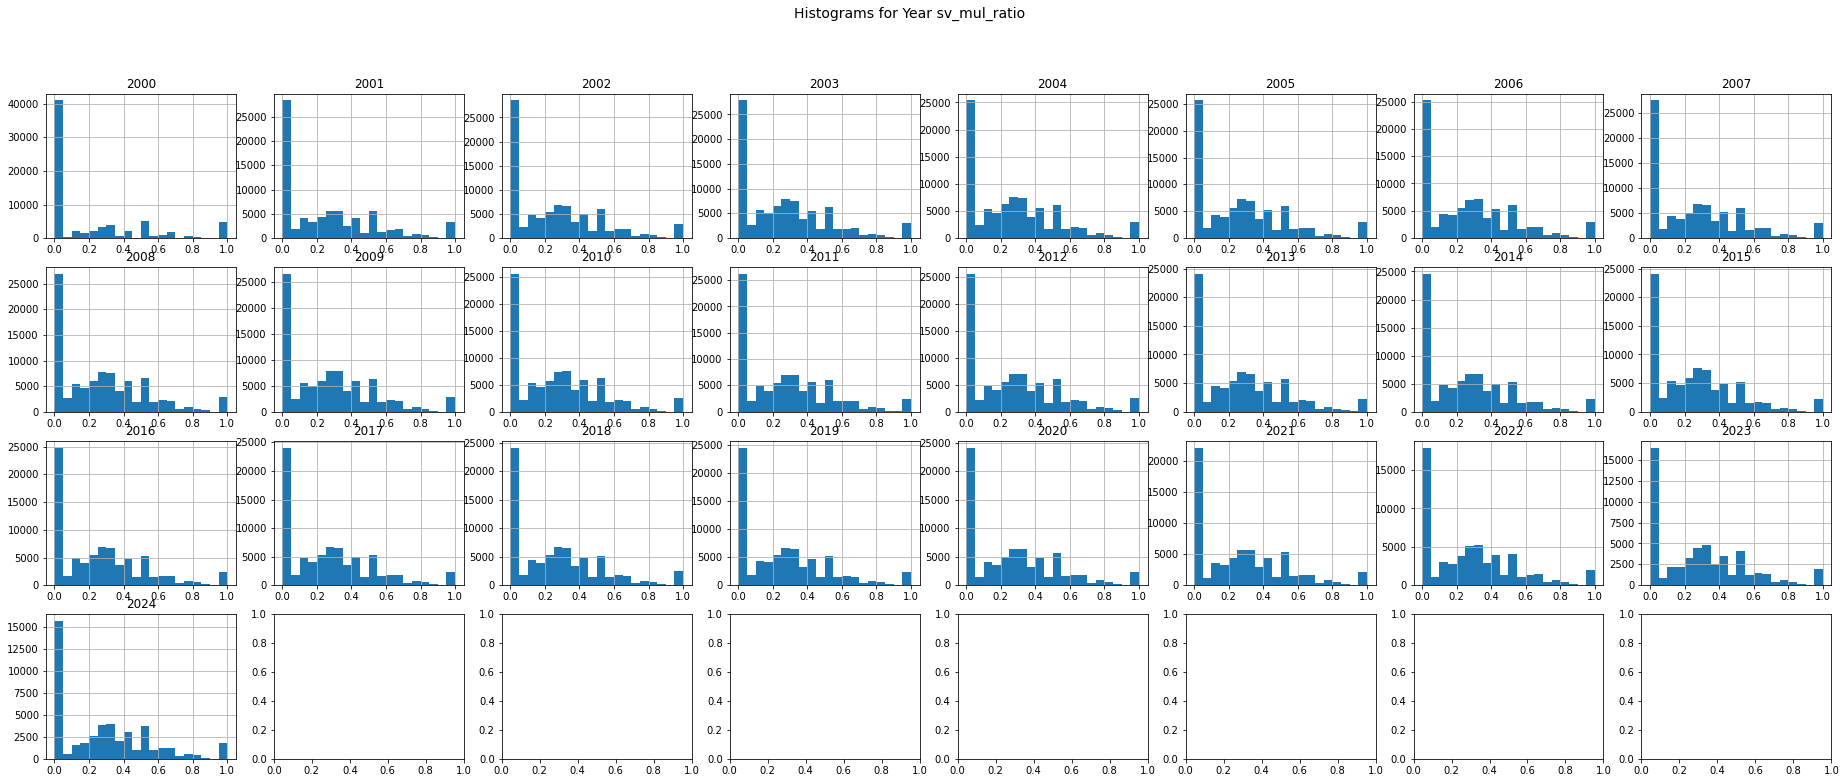

sv_avg_distance


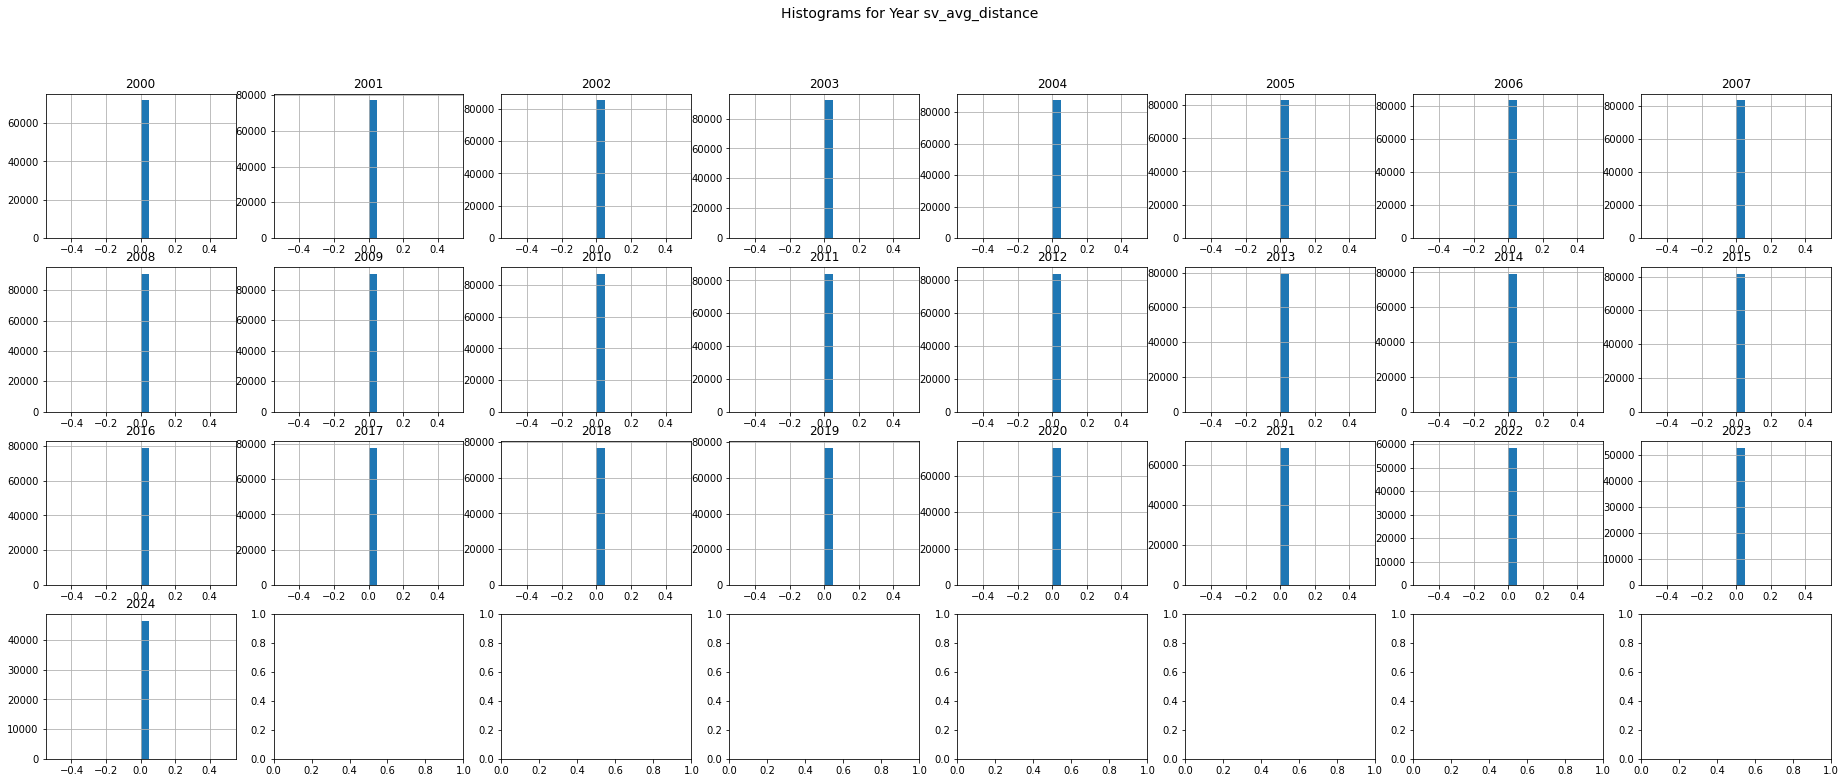

sv_distance_diff


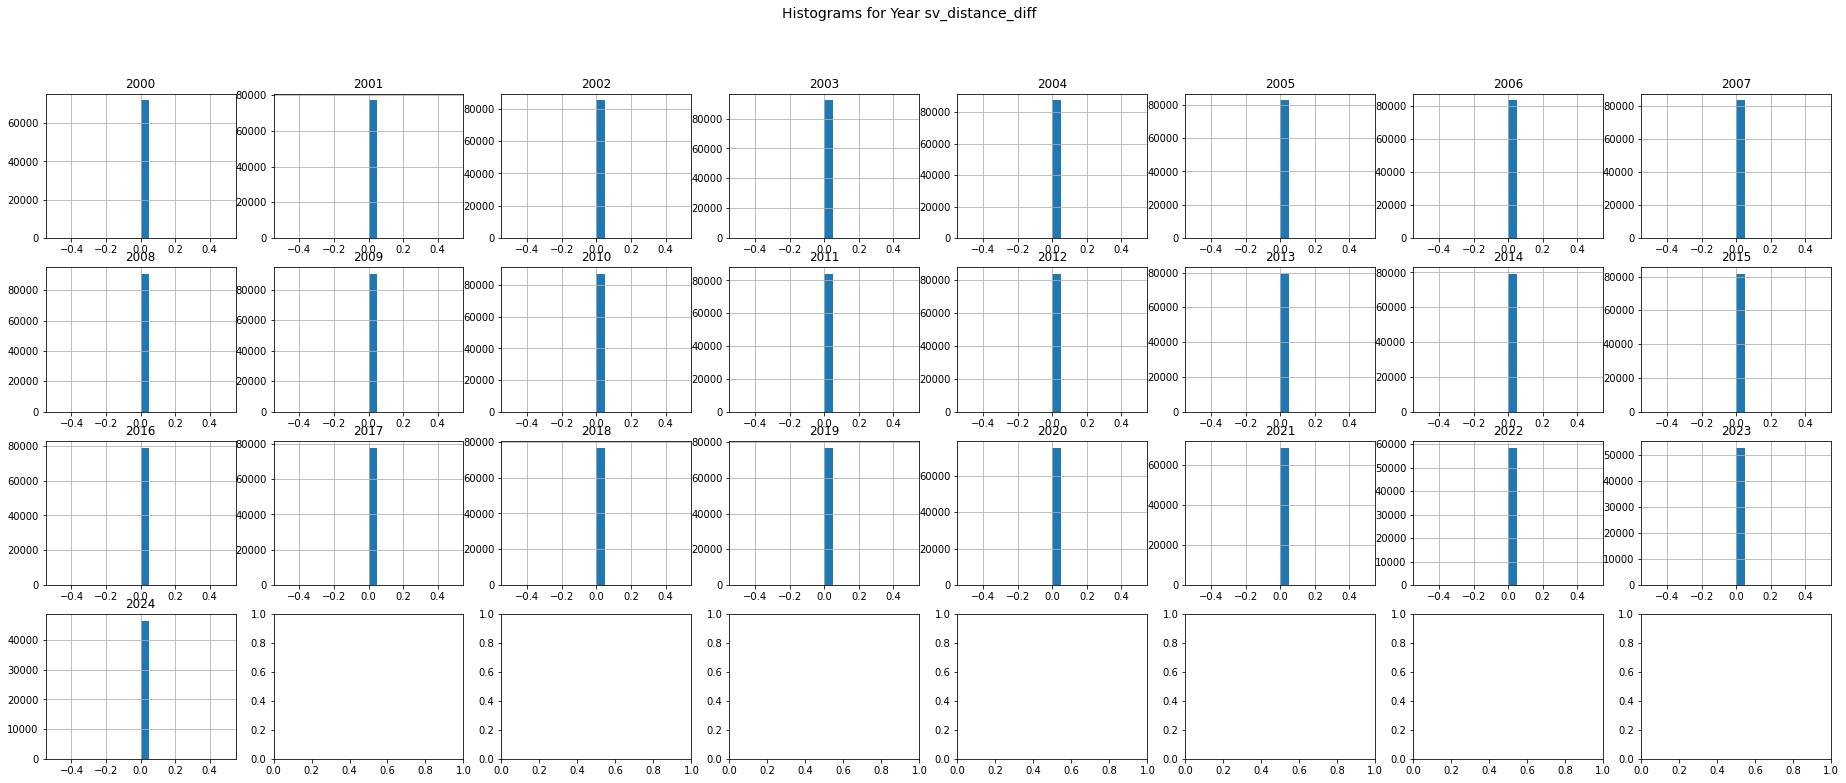

sv_arg_dev


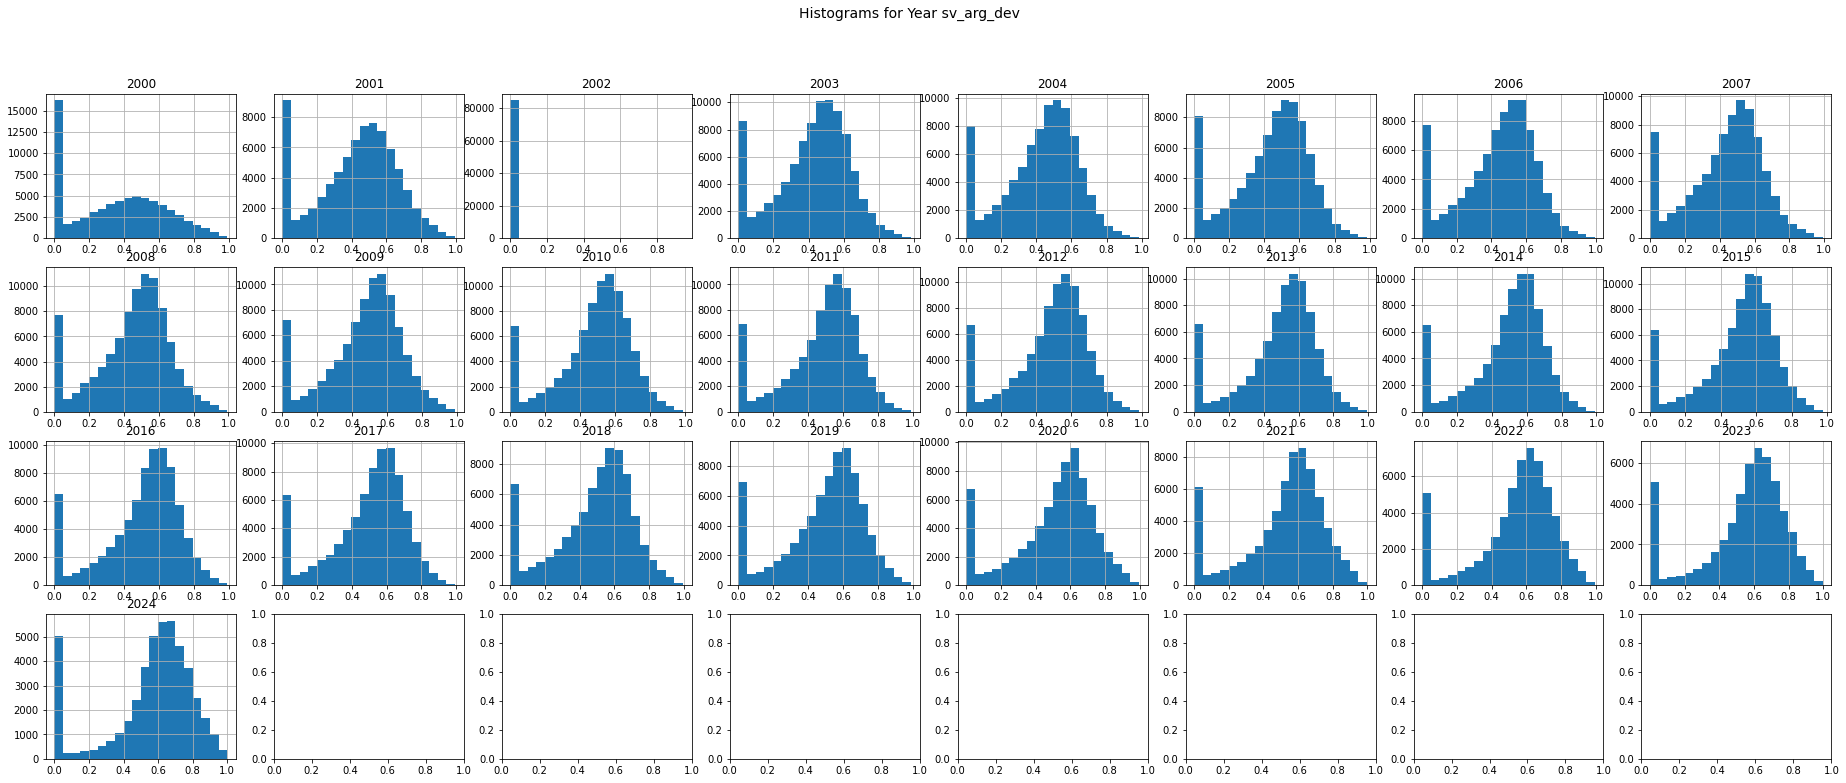

sv_arg_3fd


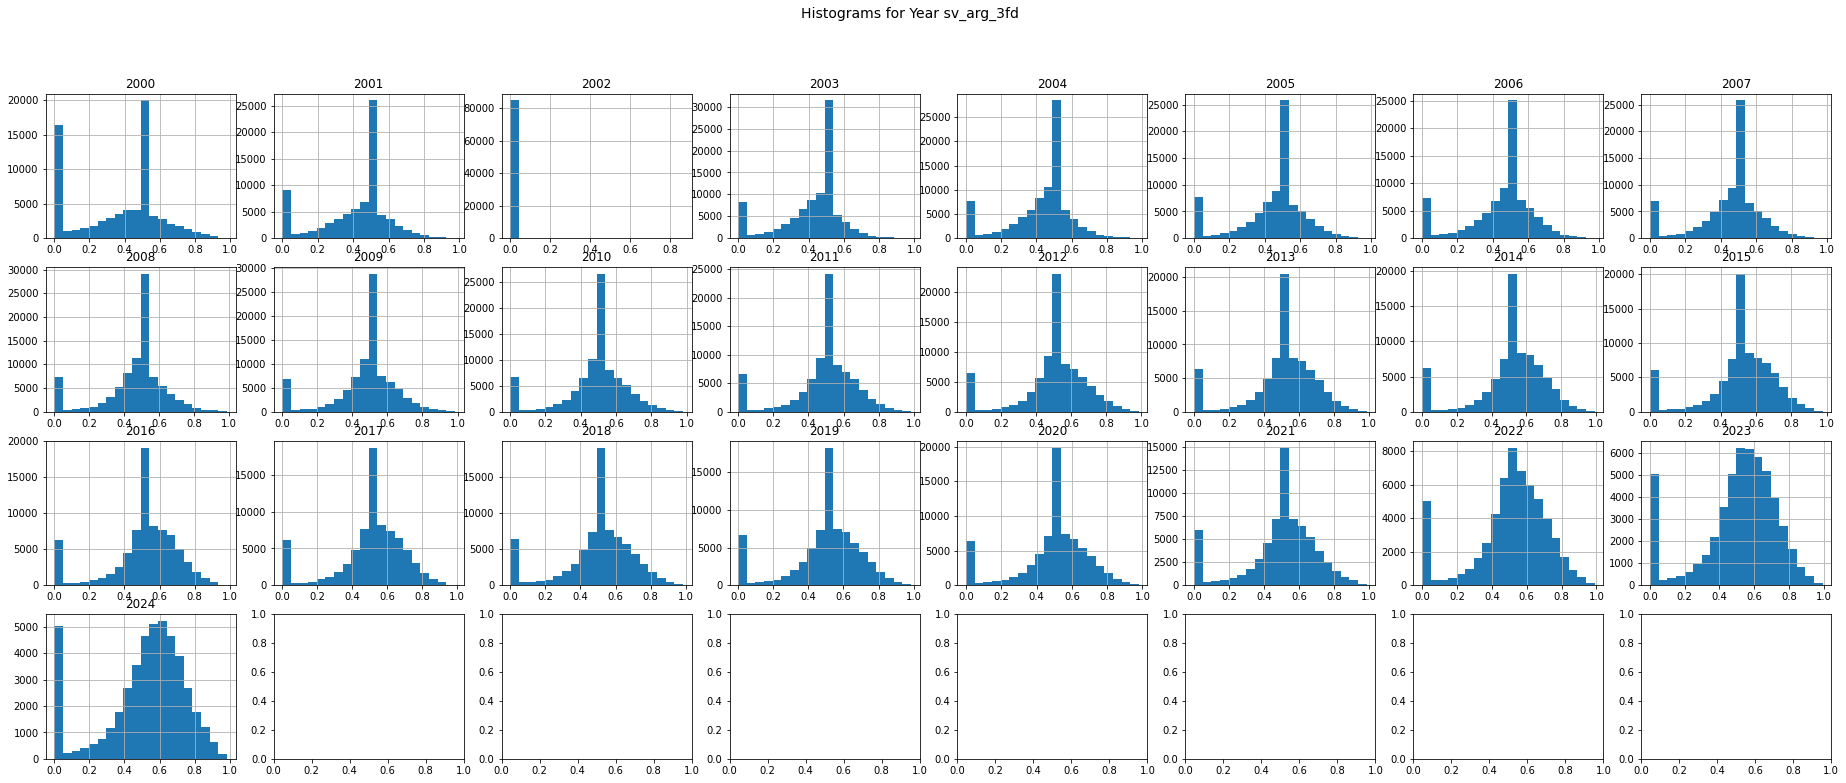

sv_straight_dev


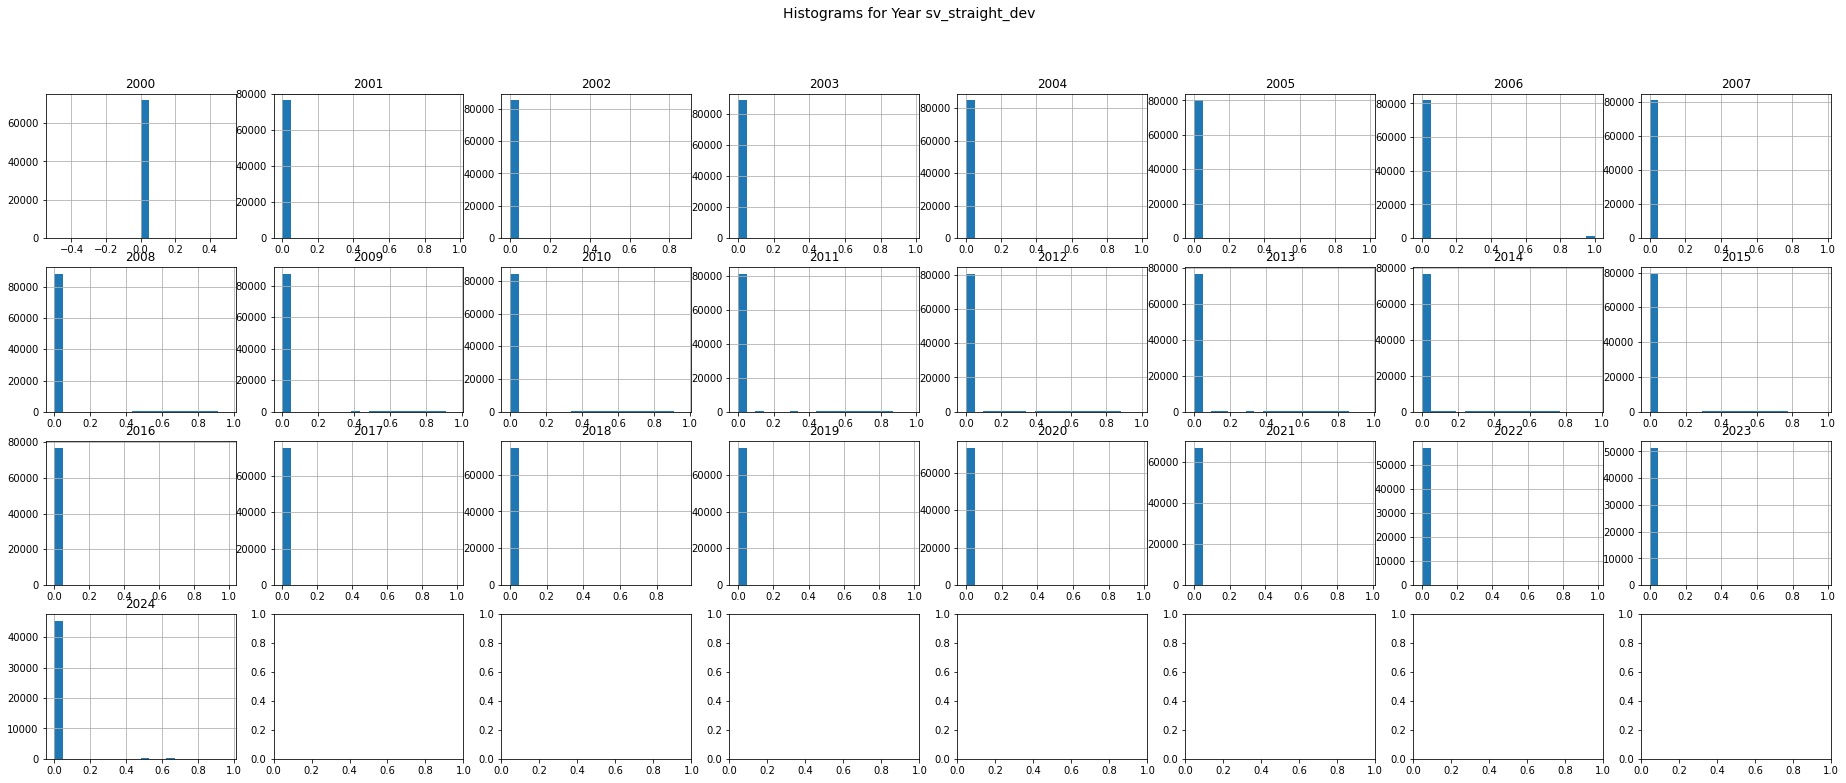

sv_l_corner_dev


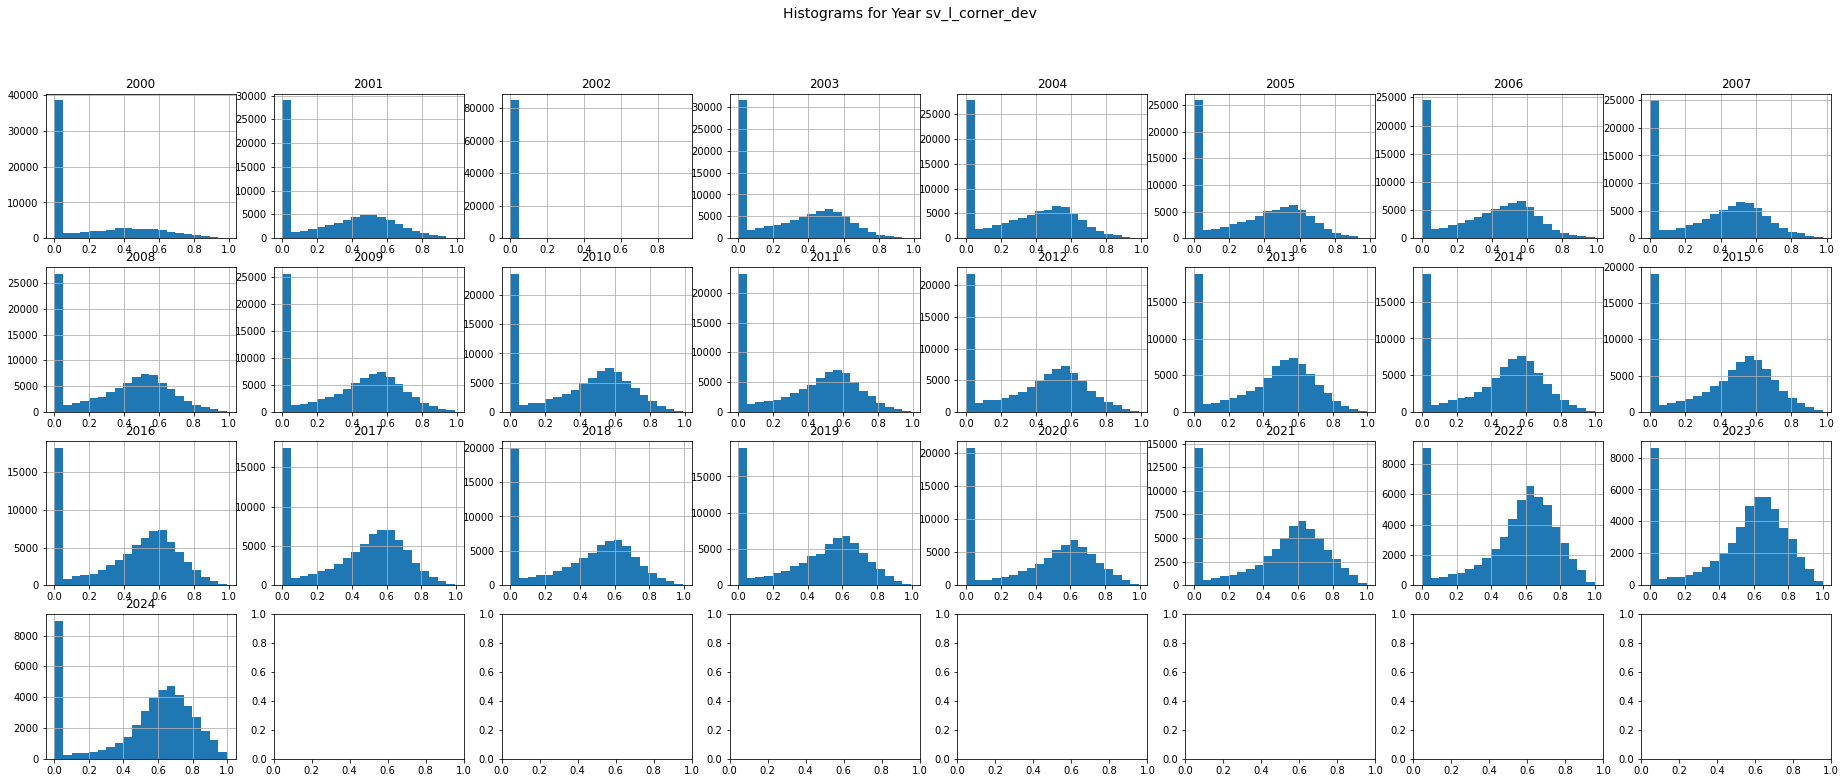

sv_r_corner_dev


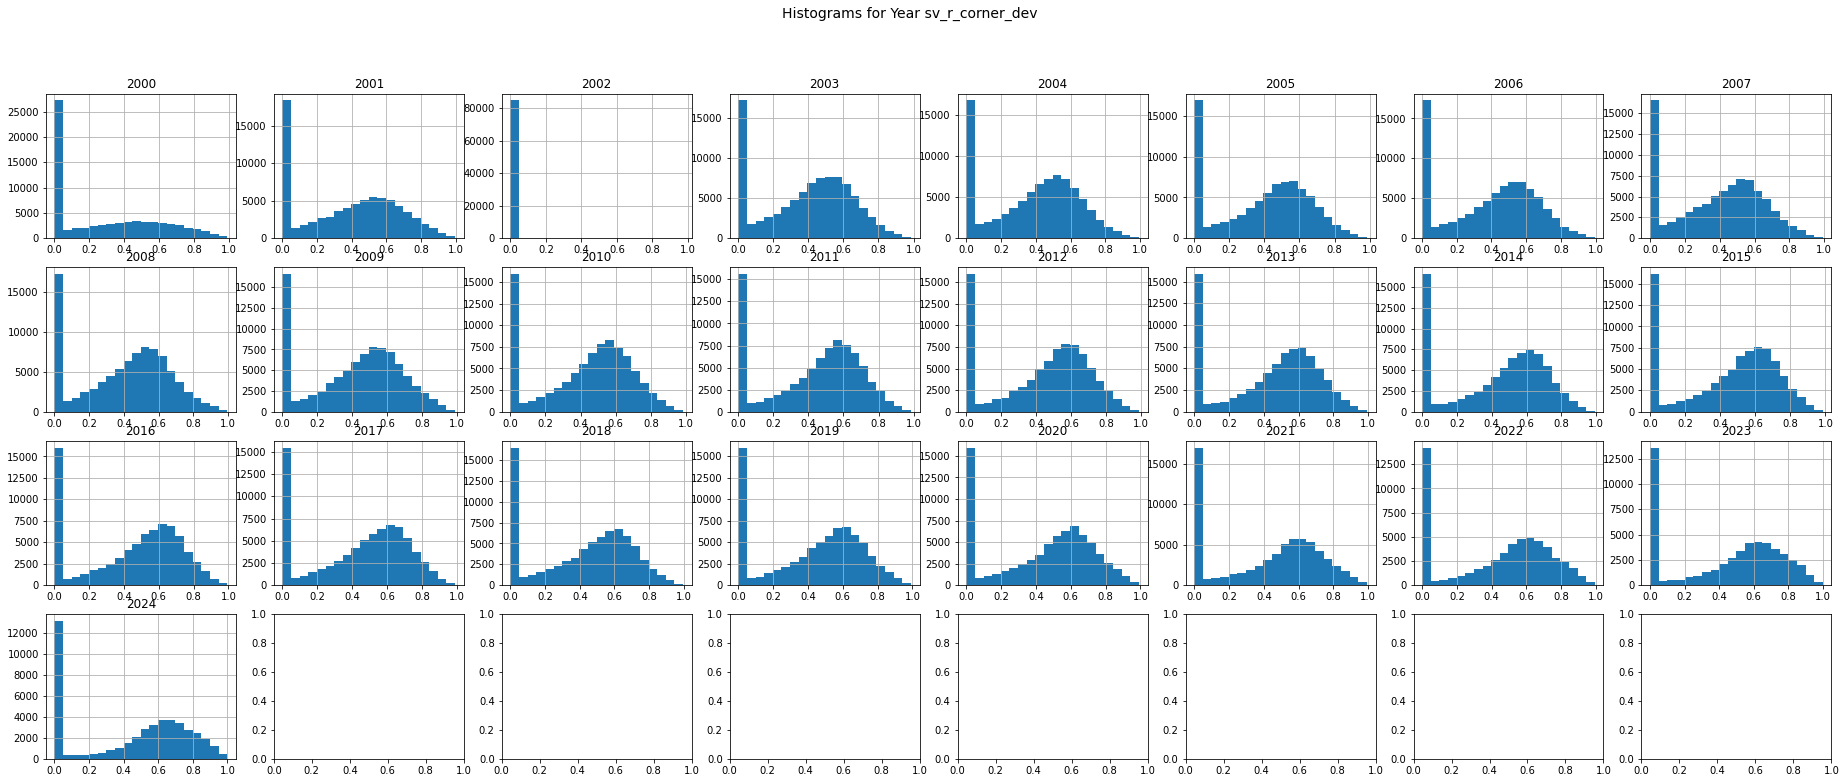

sv_turf_dev


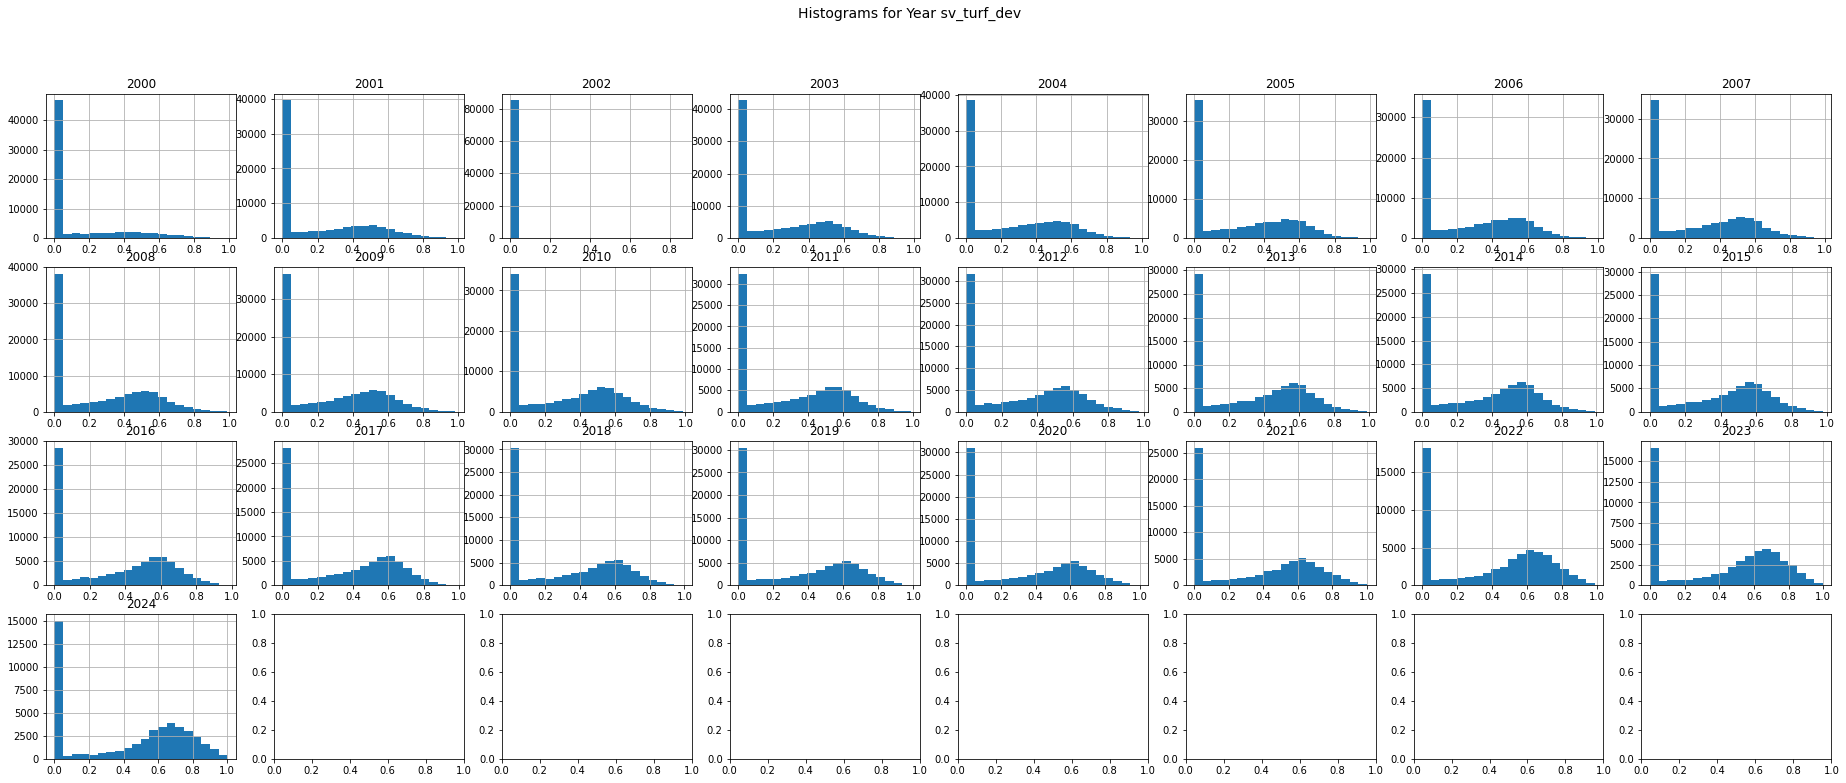

sv_dirt_dev


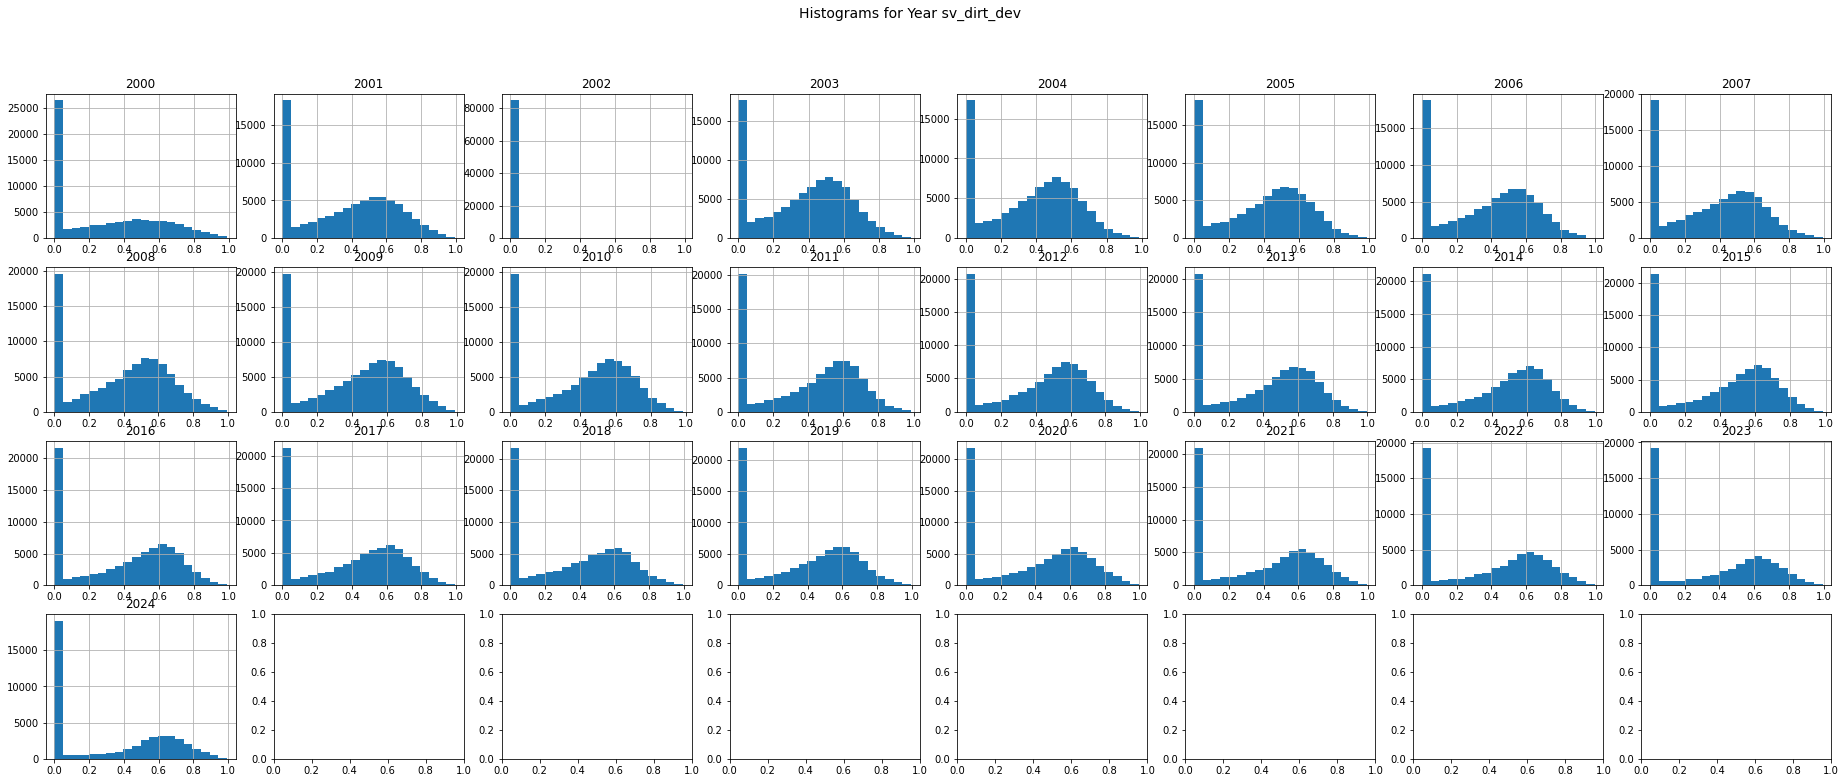

sv_sire_win_score


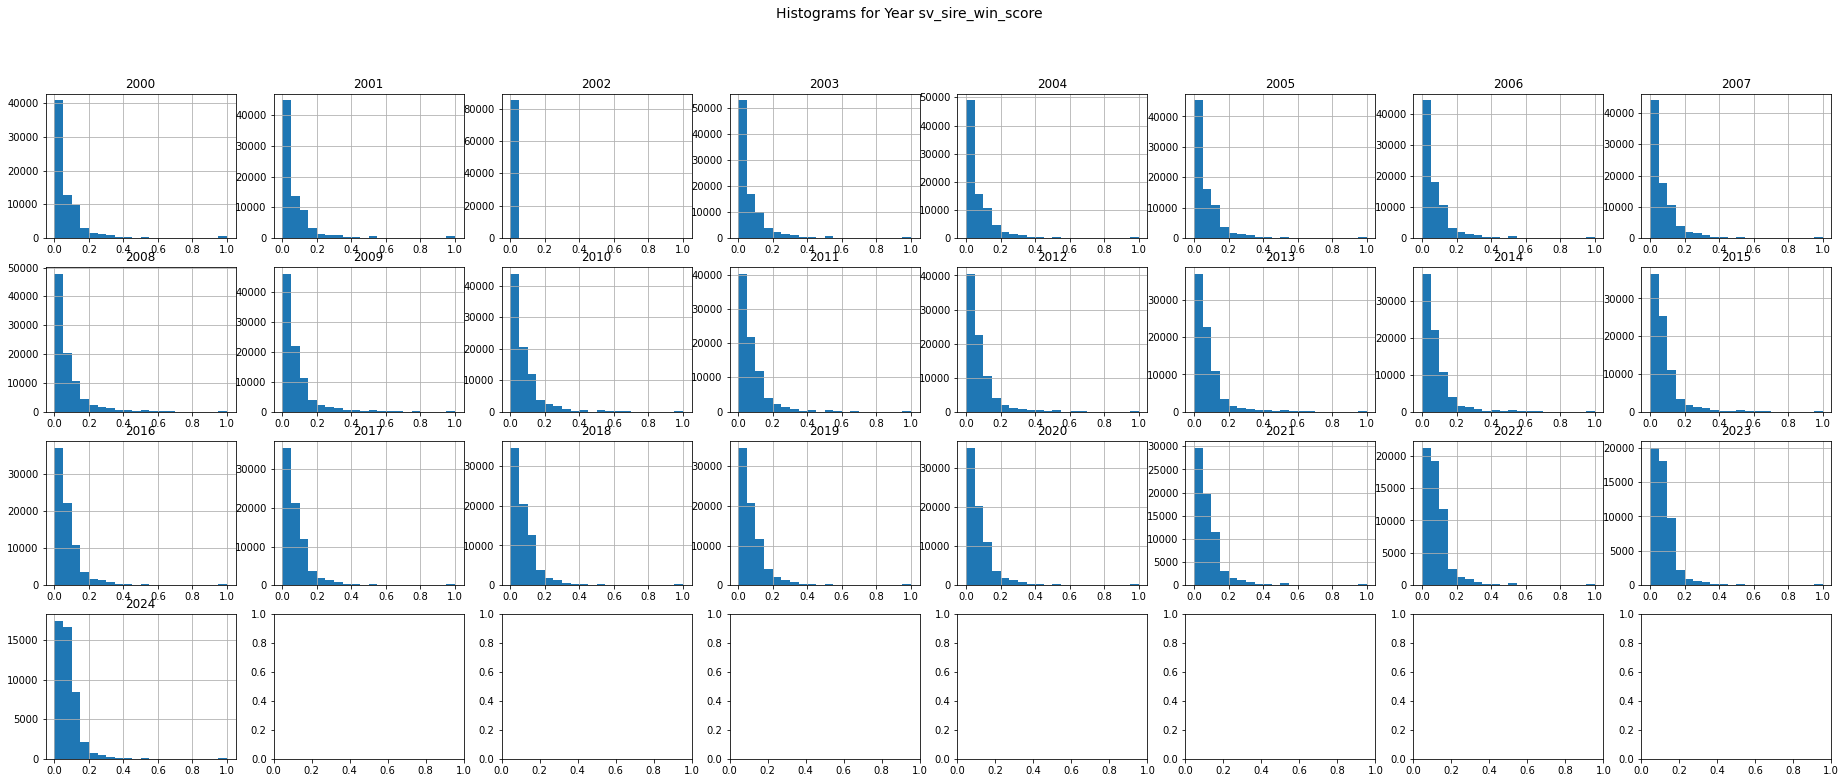

sv_sire_mul_score


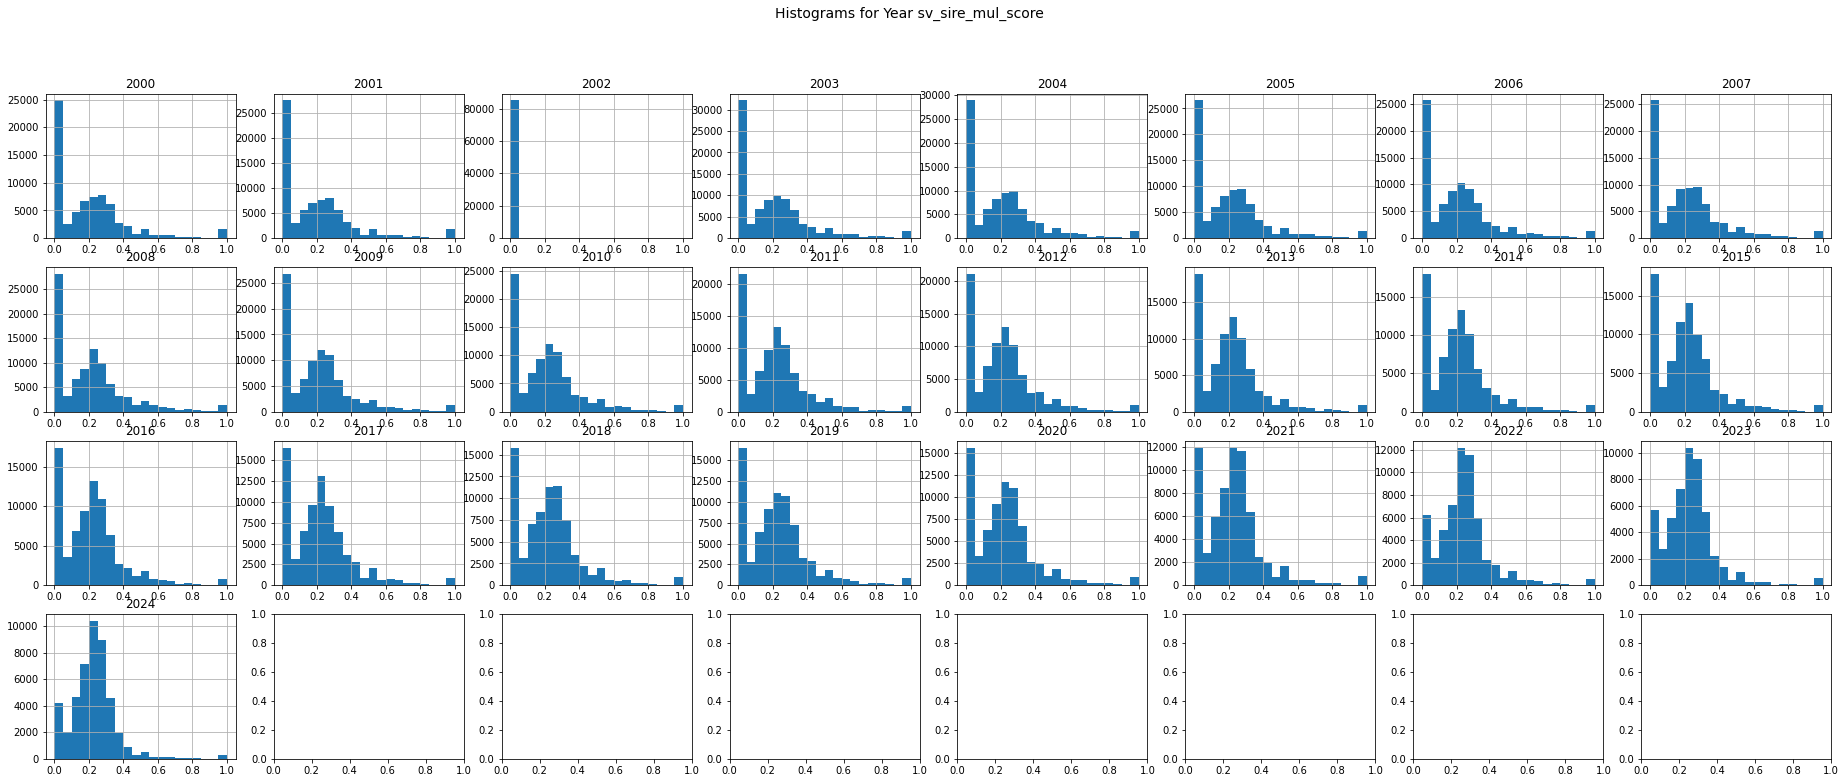

sv_tr_score


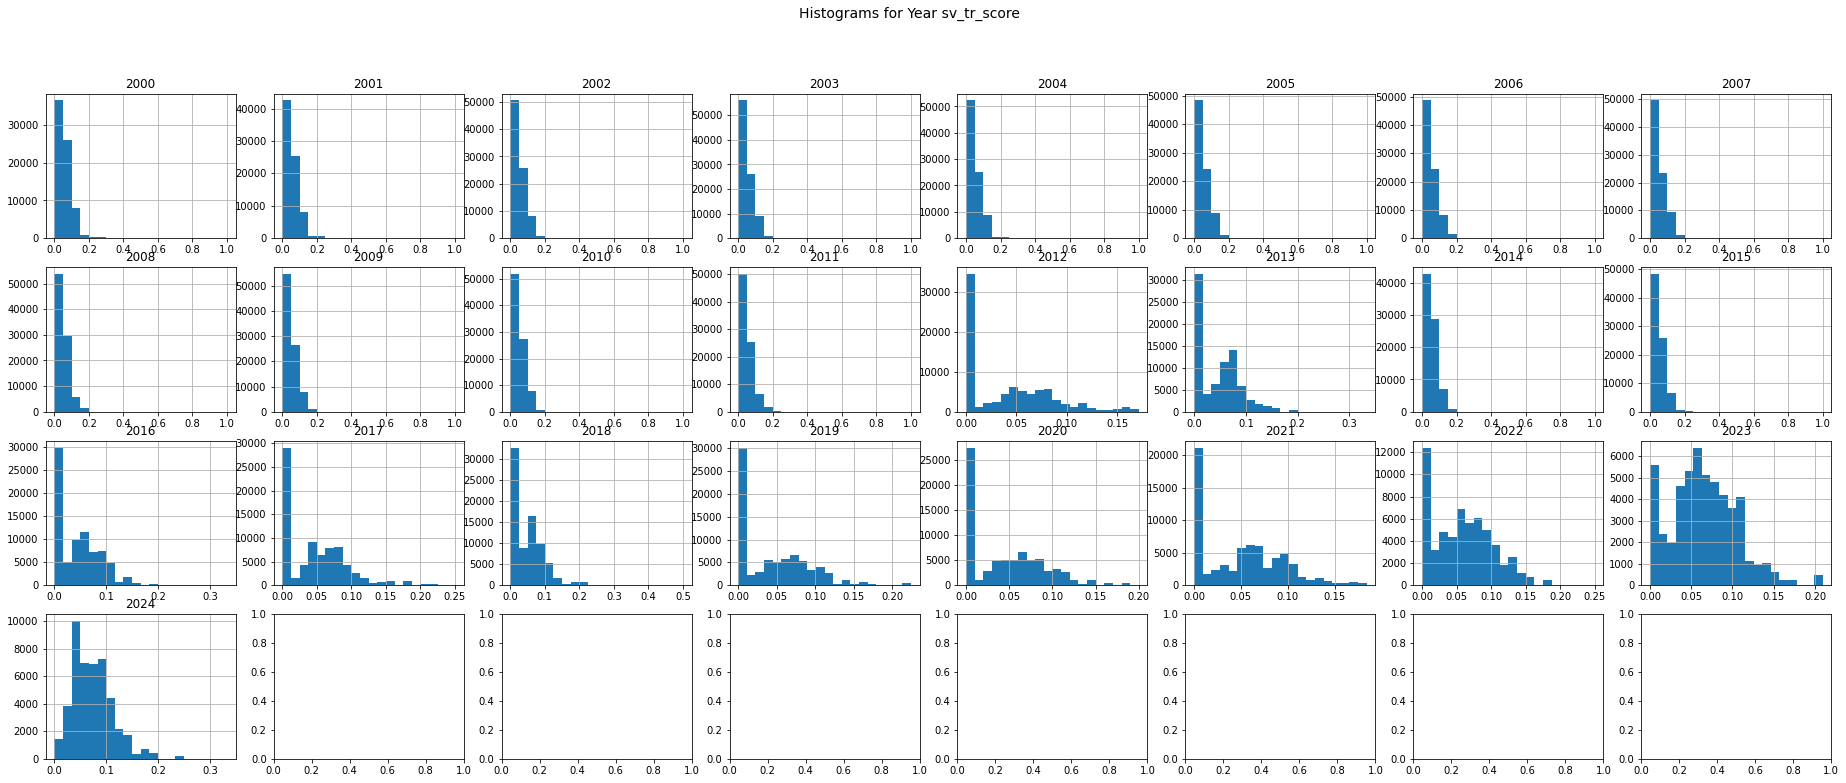

sv_jk_score


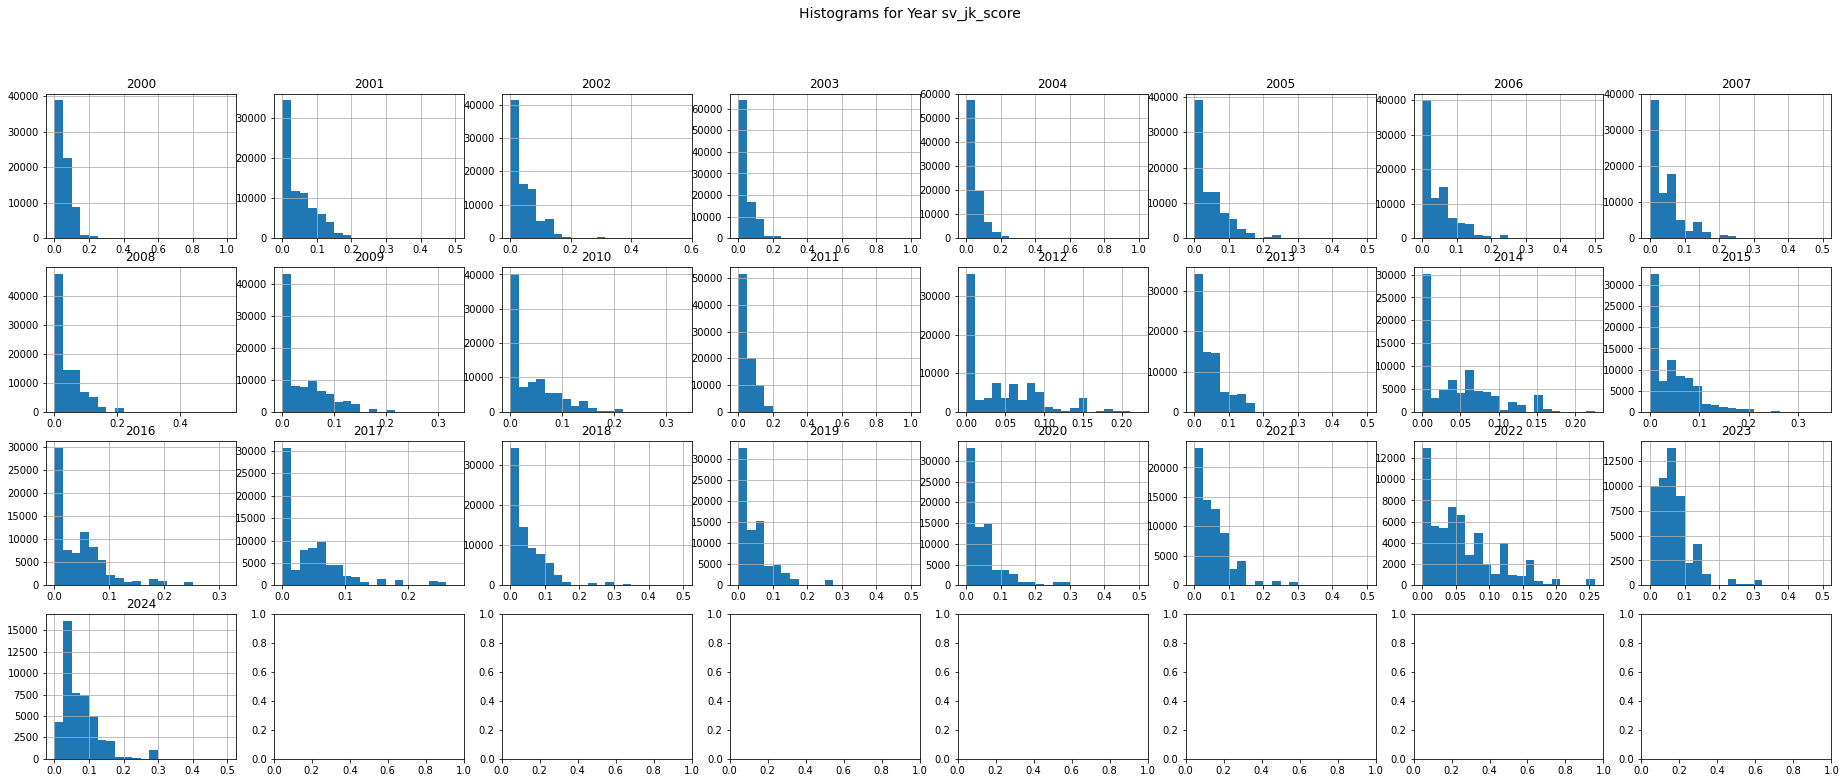

sv_speed_exp


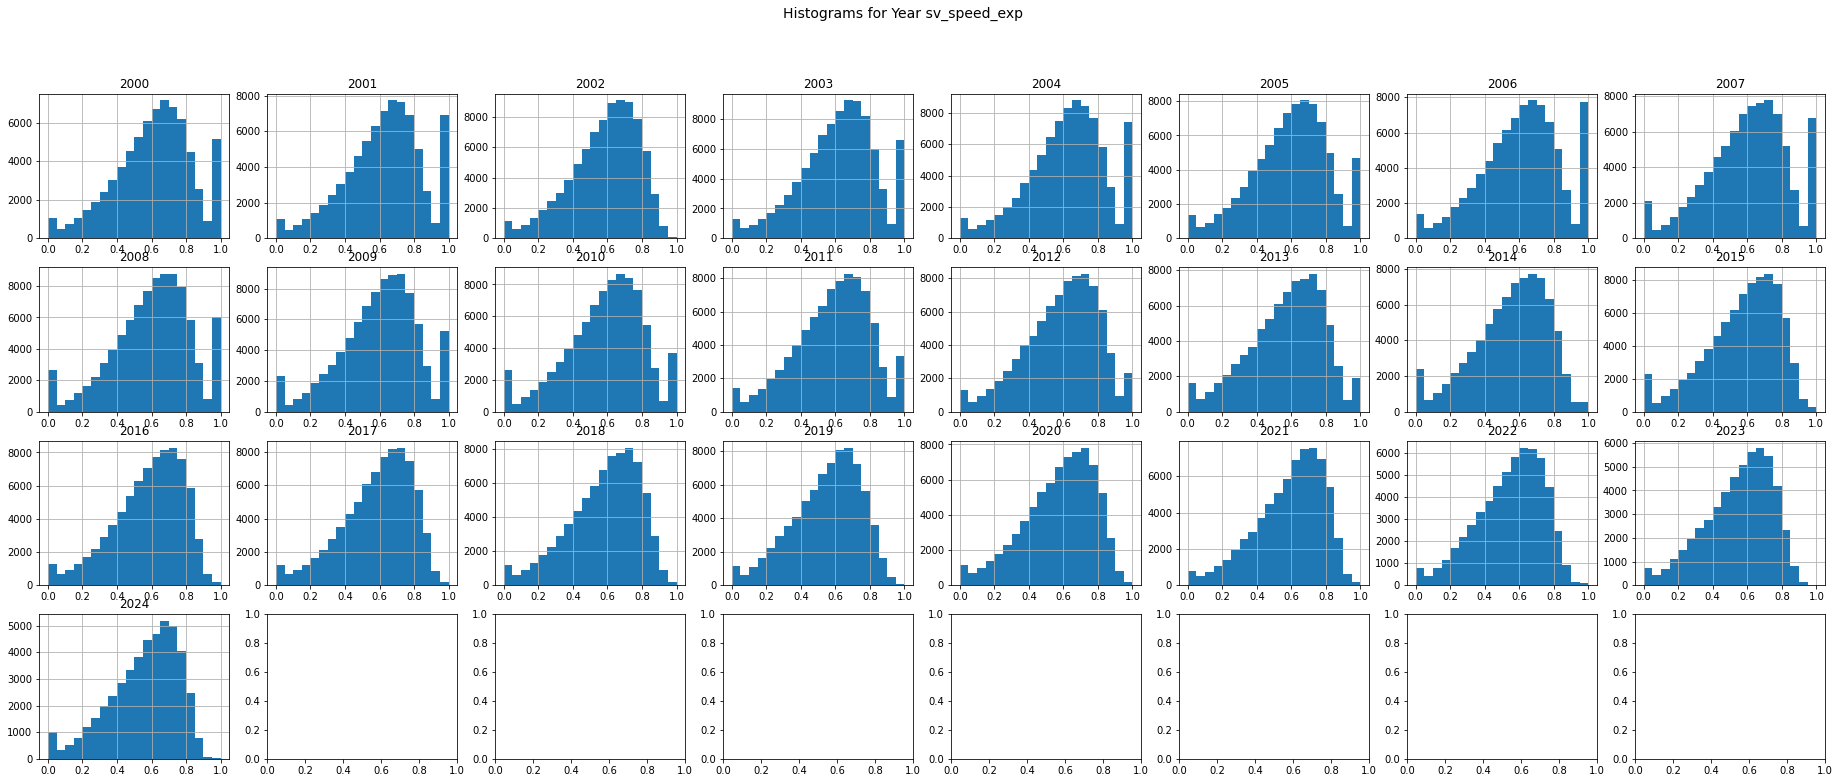

sv_speed_3f_exp


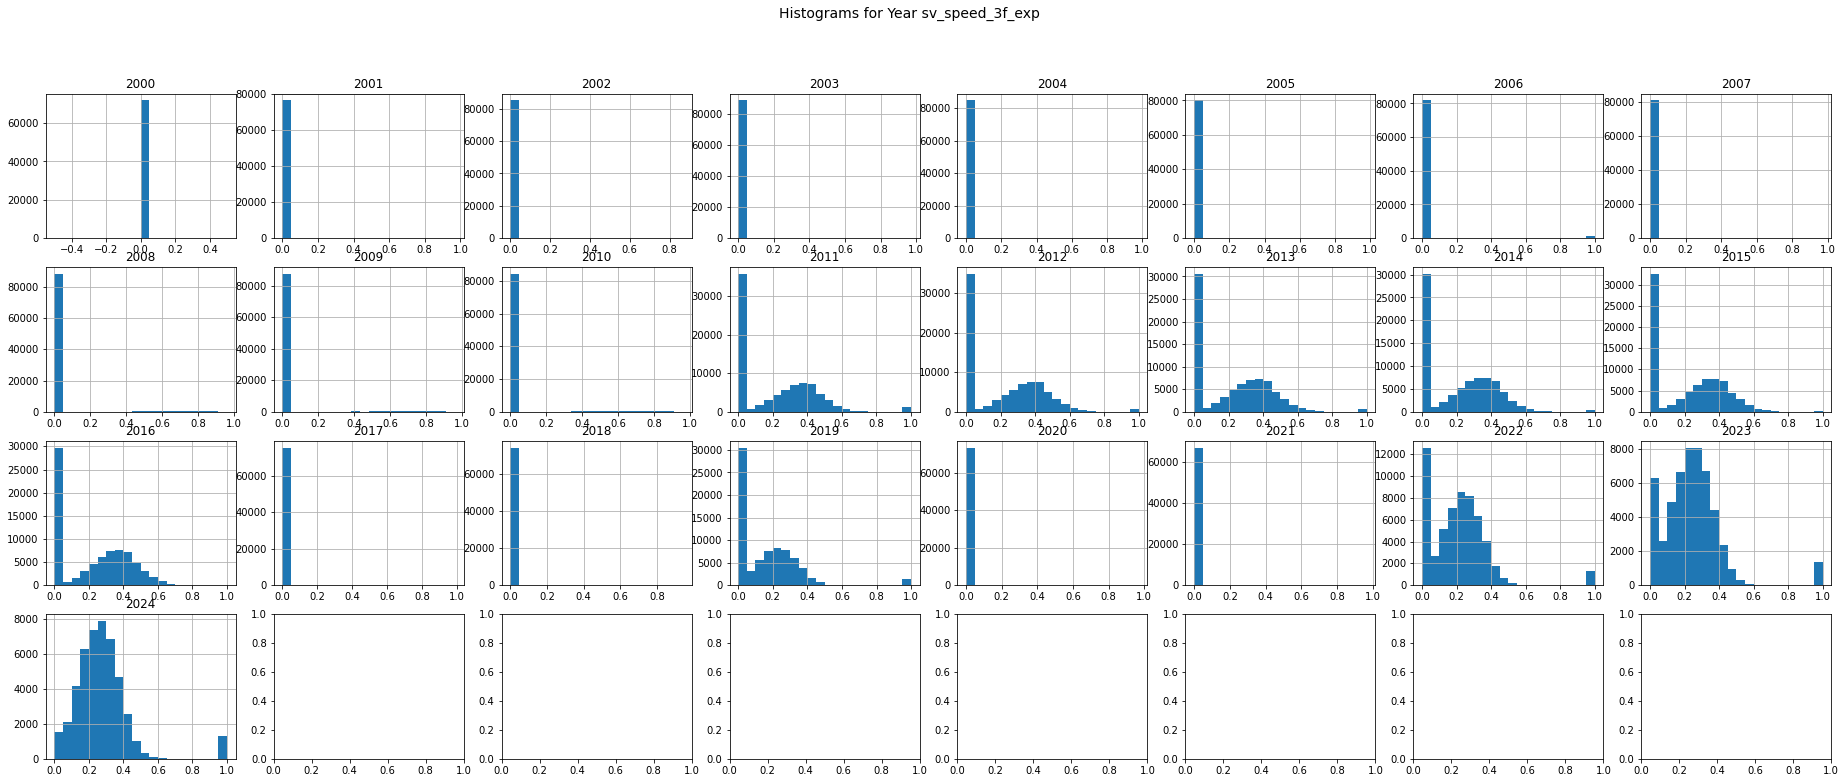

sv_speed_exp_l4


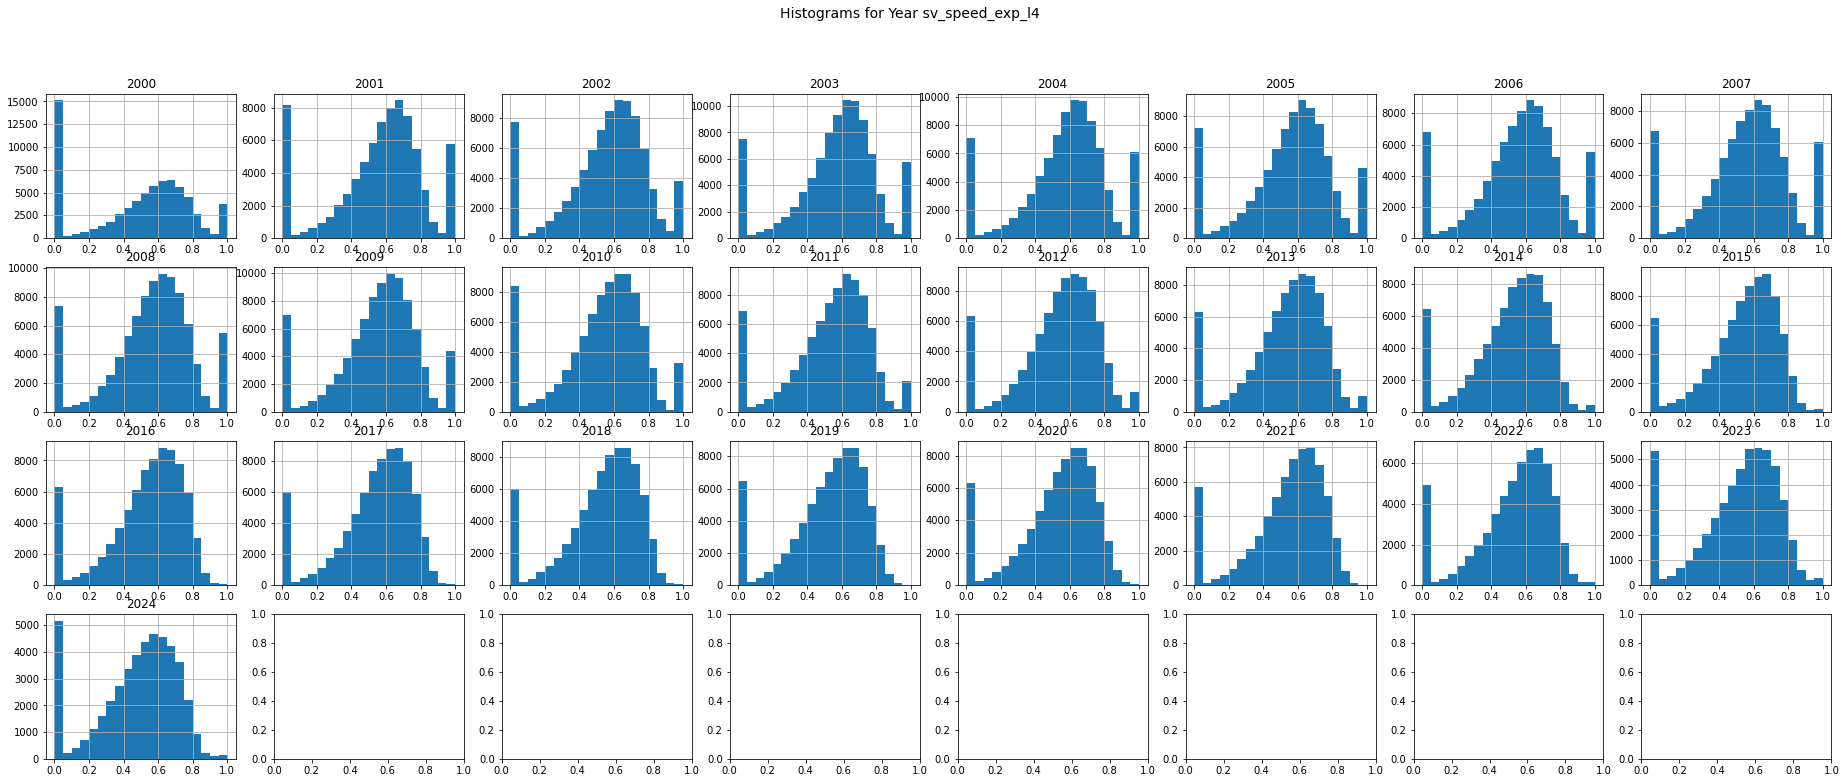

sv_vote


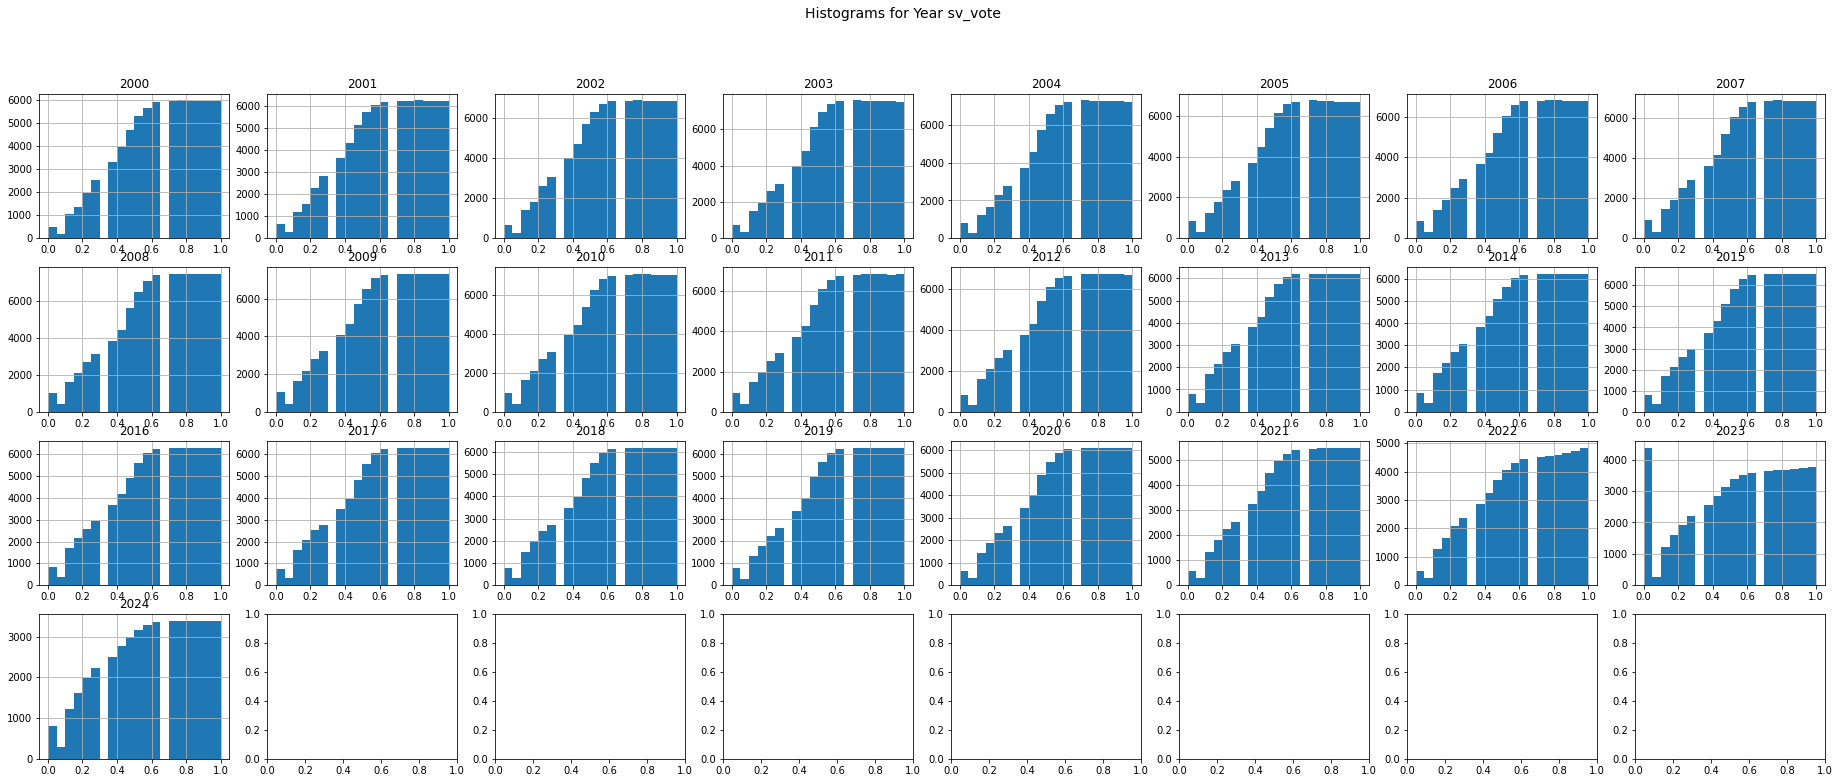

sv_win_score_wa


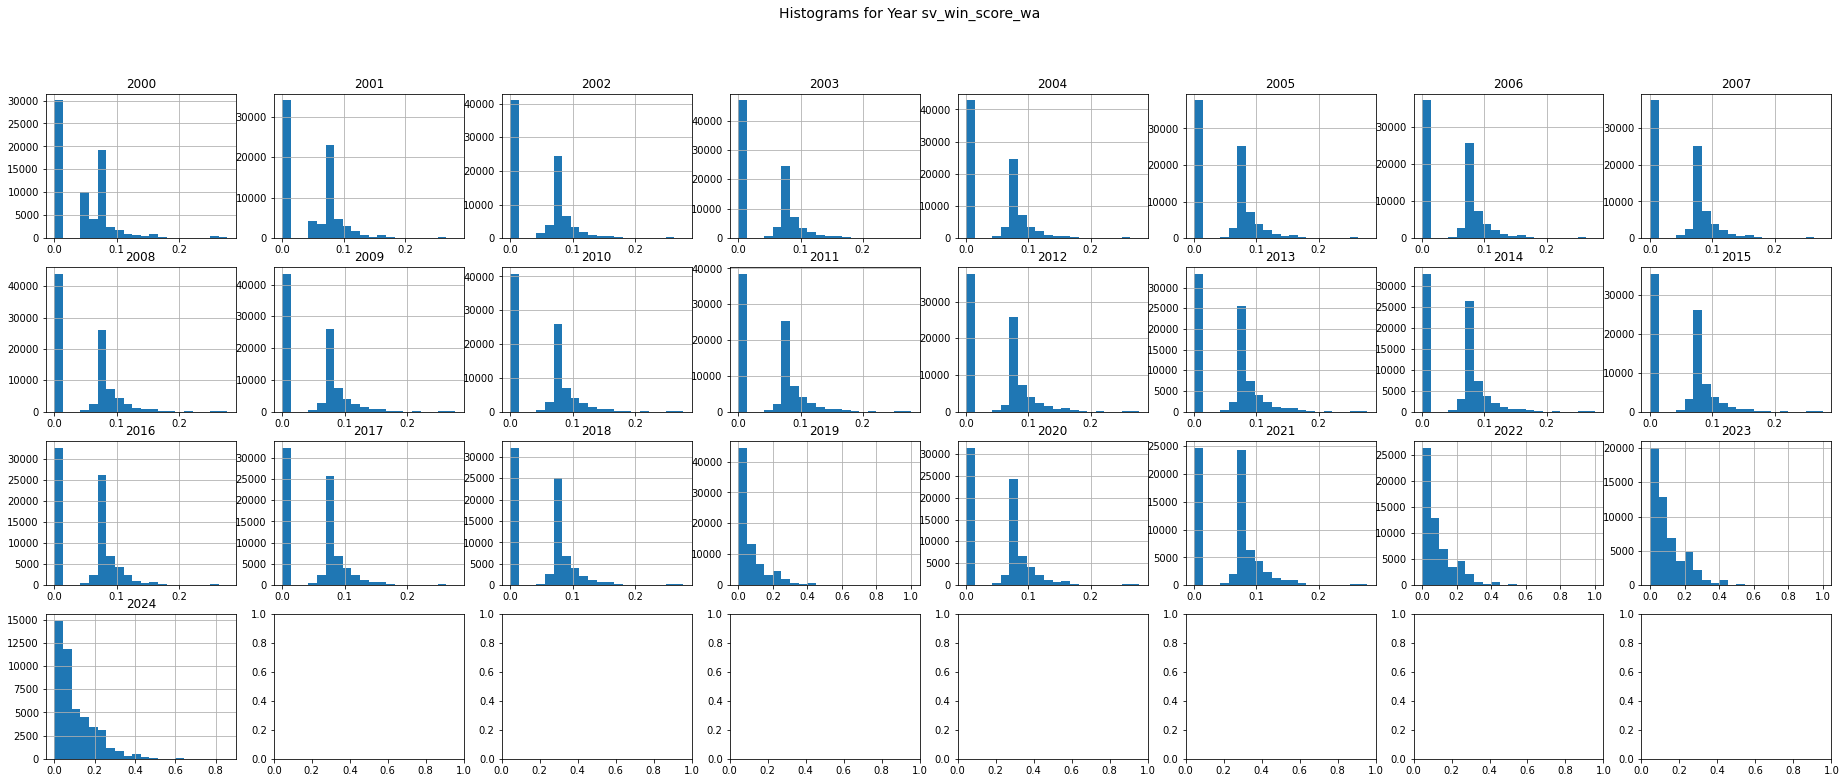

sv_mul_score_wa


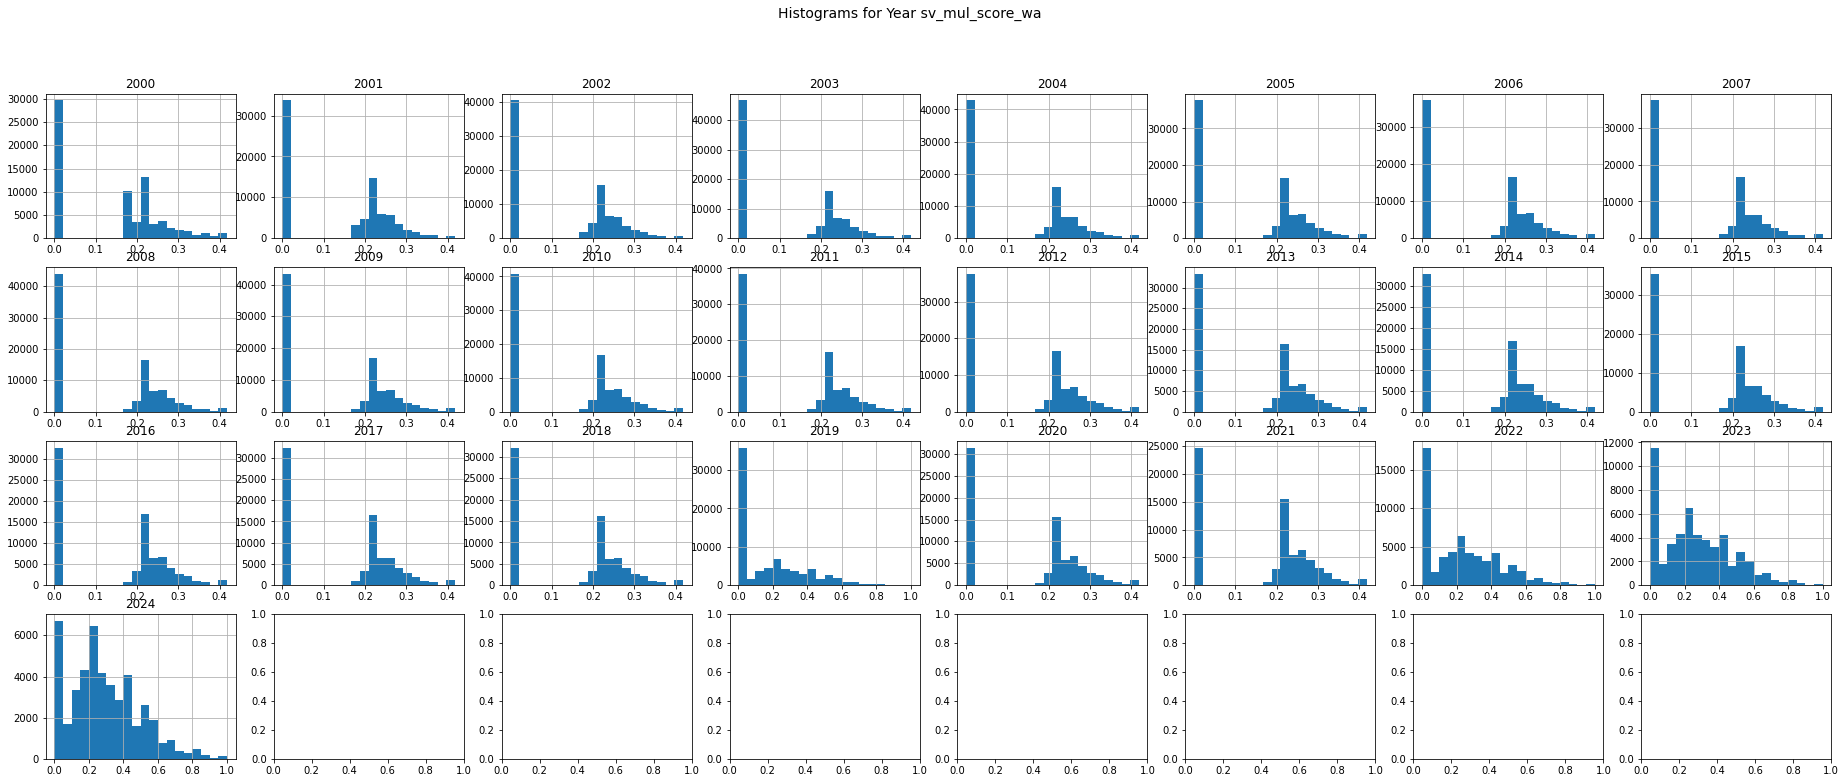

In [12]:
# dict_statistics2 = k_a_util.pivot_statistics_by_column(dict_statistics)
# #ヒストグラムの作成 (グラフの行数、列数、解像度を適宜変更)
# k_a_util.plot_histograms(dict_statistics2, rows=4, cols=8, dpi=72)


dict_results = k_a_util.pivot_statistics_by_column2(dict_statistics)

k_a_util.plot_histograms(dict_results, rows=4, cols=8, dpi=72)